# Ecomm Sales Optimization & Customer Satisfaction

The project aims to optimize e-commerce sales and enhance customer satisfaction by performing comprehensive data analysis across multiple datasets, including sales, customer, feedback, browsing, and purchase data. The analysis involves data preprocessing, exploratory data analysis (EDA), and visualization to identify patterns, trends, and actionable insights. The study focuses on sales performance, customer behavior, feedback resolution, and product effectiveness to support data-driven decision-making for boosting revenue and improving the customer experience.

# Importing Necessary Libraries and datasets

In [1]:
# Importing Necessary libraries for initial EDA
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the datasets
browsing_data = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Ecommerce_Browsing_Data.csv')
customer_data = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Ecommerce_Customer_Data.csv')
feedback_data = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Ecommerce_Feedback_Data.csv')
purchase_data = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Ecommerce_Purchase_Data.csv')
sales_data = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Ecommerce_Sales_Performance_Data.csv')

# Checking all datasets

In [3]:
browsing_data.head(3)

Session_ID  Customer_ID Product_Viewed     Category  Page_Duration_Seconds  \
0           1         1167         Laptop      Gadgets              90.925247   
1           2         7217     Headphones  Accessories             220.842532   
2           3         4336         Laptop  Accessories             224.462520   

   Pages_Viewed Device_Type  Referrer Time_of_Day Bounce  
0           6.0     Desktop    Direct   Afternoon    Yes  
1           5.0      Mobile    Google     Evening    Yes  
2           6.0     Desktop  Facebook     Morning    Yes

In [4]:
customer_data.head(3)

Customer_ID Customer_Name  Age      Gender  Annual_Income  Country  \
0            1         David   41      Female  132381.045619  Germany   
1            2       Charlie   21      Female   96650.145757    Japan   
2            3       Charlie   78  Non-Binary   71372.741420       UK   

   Purchase_Frequency Loyalty_Status   Total_Spend  \
0                  91           Gold  11937.797686   
1                  90           Gold   9522.784272   
2                  74         Silver  75457.154214   

   Customer_Satisfaction_Score  
0                     8.865703  
1                     4.813115  
2                     2.726824

In [5]:
feedback_data.head(3)

Feedback_ID  Customer_ID  Product_ID    Rating  \
0            1         3752        5270  3.825838   
1            2        10710        5941  3.369761   
2            3         3666        4819  4.616011   

                   Feedback_Date Feedback_Type Resolution_Status  \
0  2023-04-09 19:18:56.996575904       Neutral          Resolved   
1  2023-04-09 19:18:56.996575904      Positive        Unresolved   
2  2023-04-09 19:18:56.996575904      Positive          Resolved   

   Customer_Service_Score  Likelihood_to_Recommend  Feedback_Comments_Length  
0                9.219534                 6.335776                       134  
1                3.967317                 8.249971                       108  
2                4.392029                 2.265261                        20

In [6]:
purchase_data.head(3)

Purchase_ID  Customer_ID  Product_ID  Purchase_Amount Discount_Applied  \
0            1         5252        6998       526.394118              Yes   
1            2        15851        4633      1527.576145              Yes   
2            3        15566       13836      1644.674663               No   

  Payment_Method               Purchase_Date  Quantity_Purchased  \
0         Crypto  2024-03-15 00:21:40.766346                   6   
1     Debit Card  2024-03-15 00:21:40.766346                   3   
2     Debit Card  2024-03-15 00:21:40.766346                   7   

   Shipping_Cost  Delivery_Time_Days  
0      34.087444                  12  
1      30.625247                   9  
2      44.561384                   4

In [7]:
sales_data.head(3)

Sales_ID  Customer_ID  Product_ID  Sales_Amount  Region  \
0         1        12200       13508   2948.801425  Europe   
1         2        13548        3028   2181.943599    Asia   
2         3        10270       14583   4346.584445    Asia   

                      Sales_Date  Profit_Margin Discount_Applied  \
0  2020-02-10 23:42:42.204467634       0.294031              Yes   
1  2020-02-10 23:42:42.204467634       0.327759              Yes   
2  2020-02-10 23:42:42.204467634       0.341870               No   

  Sales_Channel  Return_Rate  
0        Online     0.083497  
1      In-Store     0.058271  
2        Online     0.101025

# Dataset merging

In [8]:
# Merging the dataset using inner join.
df = (
    pd.merge(sales_data, purchase_data, on='Customer_ID')
    .merge(customer_data, on='Customer_ID')
    .merge(feedback_data, on='Customer_ID')
    .merge(browsing_data, on='Customer_ID')
)

In [9]:
# saving the merged data
df.to_csv("Ecommerce_Sales.csv", index=False)

# Initial Exploratory Data Analysis

# Data Overview

In [10]:
df.shape

(18723, 46)

In [11]:
df.head()

Sales_ID  Customer_ID  Product_ID_x  Sales_Amount Region  \
0         2        13548          3028   2181.943599   Asia   
1         2        13548          3028   2181.943599   Asia   
2         2        13548          3028   2181.943599   Asia   
3         2        13548          3028   2181.943599   Asia   
4         2        13548          3028   2181.943599   Asia   

                      Sales_Date  Profit_Margin Discount_Applied_x  \
0  2020-02-10 23:42:42.204467634       0.327759                Yes   
1  2020-02-10 23:42:42.204467634       0.327759                Yes   
2  2020-02-10 23:42:42.204467634       0.327759                Yes   
3  2020-02-10 23:42:42.204467634       0.327759                Yes   
4  2020-02-10 23:42:42.204467634       0.327759                Yes   

  Sales_Channel  Return_Rate  ...  Feedback_Comments_Length  Session_ID  \
0      In-Store     0.058271  ...                       165        8387   
1      In-Store     0.058271  ...                       191        8387   
2      In-Store     0.058271  ...                       221        8387   
3      In-Store     0.058271  ...                       165        8387   
4      In-Store     0.058271  ...                       191        8387   

   Product_Viewed Category Page_Duration_Seconds Pages_Viewed  Device_Type  \
0          Tablet  Gadgets             30.389017          7.0       Mobile   
1          Tablet  Gadgets             30.389017          7.0       Mobile   
2          Tablet  Gadgets             30.389017          7.0       Mobile   
3          Tablet  Gadgets             30.389017          7.0       Mobile   
4          Tablet  Gadgets             30.389017          7.0       Mobile   

   Referrer  Time_of_Day Bounce  
0  Facebook      Evening     No  
1  Facebook      Evening     No  
2  Facebook      Evening     No  
3  Facebook      Evening     No  
4  Facebook      Evening     No  

[5 rows x 46 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sales_ID                     18723 non-null  int64  
 1   Customer_ID                  18723 non-null  int64  
 2   Product_ID_x                 18723 non-null  int64  
 3   Sales_Amount                 17724 non-null  float64
 4   Region                       18723 non-null  object 
 5   Sales_Date                   18723 non-null  object 
 6   Profit_Margin                17833 non-null  float64
 7   Discount_Applied_x           18723 non-null  object 
 8   Sales_Channel                18723 non-null  object 
 9   Return_Rate                  18723 non-null  float64
 10  Purchase_ID                  18723 non-null  int64  
 11  Product_ID_y                 18723 non-null  int64  
 12  Purchase_Amount              17789 non-null  float64
 13  Discount_Applied

In [13]:
numerical_cols = df.select_dtypes(include=['number'])
numerical_cols = numerical_cols.loc[:, ~numerical_cols.columns.str.contains('ID')].columns
numerical_cols

Index(['Sales_Amount', 'Profit_Margin', 'Return_Rate', 'Purchase_Amount',
       'Quantity_Purchased', 'Shipping_Cost', 'Delivery_Time_Days', 'Age',
       'Annual_Income', 'Purchase_Frequency', 'Total_Spend',
       'Customer_Satisfaction_Score', 'Rating', 'Customer_Service_Score',
       'Likelihood_to_Recommend', 'Feedback_Comments_Length',
       'Page_Duration_Seconds', 'Pages_Viewed'],
      dtype='object')

In [14]:
df[numerical_cols].describe()

Sales_Amount  Profit_Margin   Return_Rate  Purchase_Amount  \
count  17724.000000   17833.000000  18723.000000     17789.000000   
mean    2618.143237       0.251062      0.103687      1071.147991   
std     1717.647674       0.086772      0.054180       752.679759   
min       21.556507       0.100031      0.010036        20.910868   
25%     1264.196529       0.175176      0.058244       542.933067   
50%     2579.486365       0.253567      0.102474      1043.296730   
75%     3835.149117       0.325760      0.149848      1529.978700   
max    19999.594186       0.399997      0.199998      9932.192959   

       Quantity_Purchased  Shipping_Cost  Delivery_Time_Days           Age  \
count        18723.000000   17787.000000        18723.000000  18723.000000   
mean             4.979544      24.960902            6.963040     48.539230   
std              2.577473      14.421778            3.741189     17.859001   
min              1.000000       0.002486            1.000000     18.000000   
25%              3.000000      12.487218            4.000000     33.000000   
50%              5.000000      25.075551            7.000000     49.000000   
75%              7.000000      37.461424           10.000000     64.000000   
max              9.000000      49.991656           13.000000     79.000000   

       Annual_Income  Purchase_Frequency    Total_Spend  \
count   17857.000000        18723.000000   17863.000000   
mean    83391.727448           49.459435   51746.191039   
std     37649.587134           28.798361   35591.095661   
min     20025.406002            1.000000     517.759159   
25%     50353.693827           24.000000   25571.074990   
50%     83656.949779           49.000000   50236.416261   
75%    115432.138990           74.000000   74573.087466   
max    149984.807819           99.000000  394721.332789   

       Customer_Satisfaction_Score        Rating  Customer_Service_Score  \
count                 18723.000000  17767.000000            17821.000000   
mean                      5.440421      2.999581                5.619403   
std                       2.565947      1.146223                3.031511   
min                       1.000013      1.000674                1.000279   
25%                       3.221722      2.017051                3.171176   
50%                       5.385937      3.022313                5.429560   
75%                       7.685289      3.979313                7.850345   
max                       9.995436      4.999333               38.772404   

       Likelihood_to_Recommend  Feedback_Comments_Length  \
count             18723.000000              18723.000000   
mean                  5.470639                251.377504   
std                   2.567124                145.745149   
min                   1.001042                  0.000000   
25%                   3.281011                124.000000   
50%                   5.407316                253.000000   
75%                   7.708263                378.000000   
max                   9.999745                499.000000   

       Page_Duration_Seconds  Pages_Viewed  
count           17778.000000  17773.000000  
mean              155.937356      4.965453  
std               100.574657      2.608233  
min                 5.040958      1.000000  
25%                78.099144      3.000000  
50%               151.688489      5.000000  
75%               225.458293      7.000000  
max              1178.036048      9.000000

# Checking for Missing Values

In [15]:
null_counts = df.isnull().sum()
null_cols = null_counts[null_counts > 0]
null_cols

Sales_Amount              999
Profit_Margin             890
Purchase_Amount           934
Shipping_Cost             936
Annual_Income             866
Total_Spend               860
Rating                    956
Customer_Service_Score    902
Page_Duration_Seconds     945
Pages_Viewed              950
dtype: int64

#  Checking for Duplicate Values

In [16]:
df.duplicated().sum()

0

# Data Cleaning and Data Formatting

In [17]:
null_cols.index

Index(['Sales_Amount', 'Profit_Margin', 'Purchase_Amount', 'Shipping_Cost',
       'Annual_Income', 'Total_Spend', 'Rating', 'Customer_Service_Score',
       'Page_Duration_Seconds', 'Pages_Viewed'],
      dtype='object')

In [18]:
interpolate_cols = null_cols.index.to_list()
interpolate_cols = [col for col in interpolate_cols if col not in ['Annual_Income', 'Rating']]  # Exclude 'Annual_Income' and 'Rating' from the list
print(interpolate_cols)

['Sales_Amount', 'Profit_Margin', 'Purchase_Amount', 'Shipping_Cost', 'Total_Spend', 'Customer_Service_Score', 'Page_Duration_Seconds', 'Pages_Viewed']


In [19]:
# using Linear interpolation to impute the missing values
df[interpolate_cols] = df[interpolate_cols].interpolate(method='linear', axis=0)

In [20]:
df['Annual_Income'].skew()

0.007552383522215635

In [21]:
# using mean to fill the null values of 'Annual_Income' since the data is not skewed
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())

In [22]:
# using mode to fill the missing values of 'rating'
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

In [23]:
df.isnull().sum()

Sales_ID                       0
Customer_ID                    0
Product_ID_x                   0
Sales_Amount                   0
Region                         0
Sales_Date                     0
Profit_Margin                  0
Discount_Applied_x             0
Sales_Channel                  0
Return_Rate                    0
Purchase_ID                    0
Product_ID_y                   0
Purchase_Amount                0
Discount_Applied_y             0
Payment_Method                 0
Purchase_Date                  0
Quantity_Purchased             0
Shipping_Cost                  0
Delivery_Time_Days             0
Customer_Name                  0
Age                            0
Gender                         0
Annual_Income                  0
Country                        0
Purchase_Frequency             0
Loyalty_Status                 0
Total_Spend                    0
Customer_Satisfaction_Score    0
Feedback_ID                    0
Product_ID                     0
Rating                         0
Feedback_Date                  0
Feedback_Type                  0
Resolution_Status              0
Customer_Service_Score         0
Likelihood_to_Recommend        0
Feedback_Comments_Length       0
Session_ID                     0
Product_Viewed                 0
Category                       0
Page_Duration_Seconds          0
Pages_Viewed                   0
Device_Type                    0
Referrer                       0
Time_of_Day                    0
Bounce                         0
dtype: int64

# Exploratory Data Analysis


# Univariant Exploratory Analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
numerical_cols

Index(['Sales_Amount', 'Profit_Margin', 'Return_Rate', 'Purchase_Amount',
       'Quantity_Purchased', 'Shipping_Cost', 'Delivery_Time_Days', 'Age',
       'Annual_Income', 'Purchase_Frequency', 'Total_Spend',
       'Customer_Satisfaction_Score', 'Rating', 'Customer_Service_Score',
       'Likelihood_to_Recommend', 'Feedback_Comments_Length',
       'Page_Duration_Seconds', 'Pages_Viewed'],
      dtype='object')

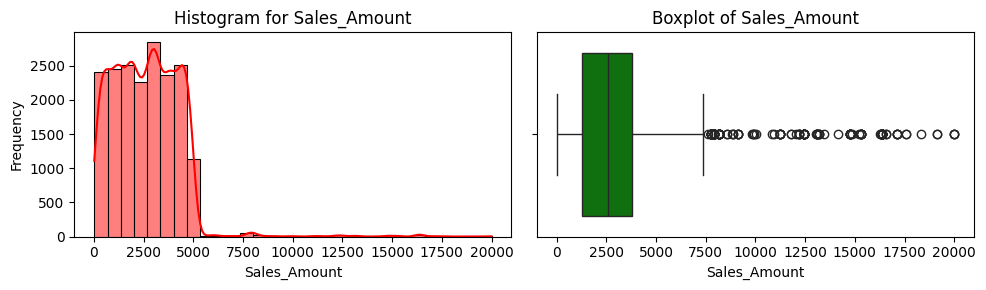

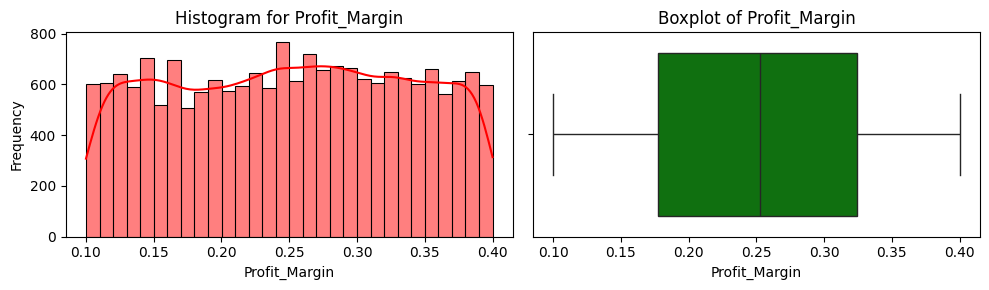

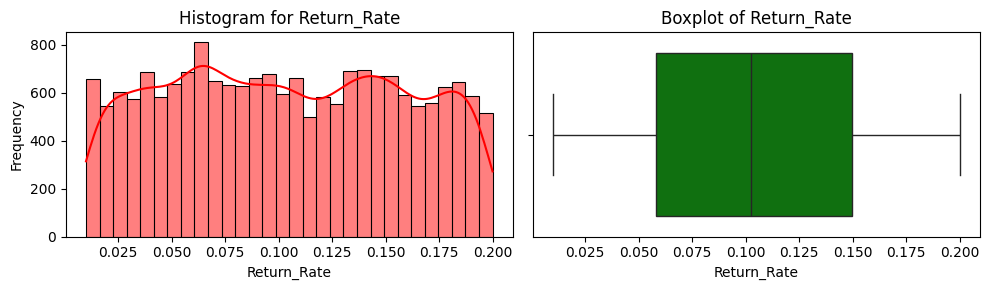

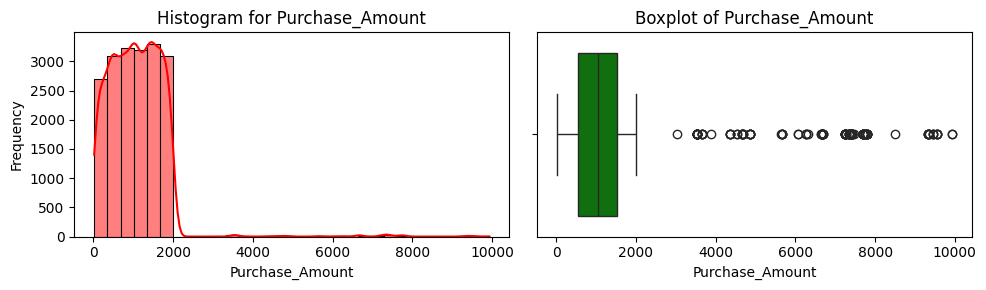

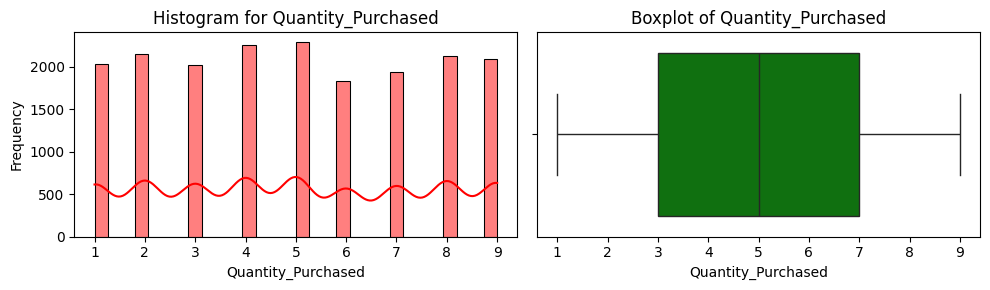

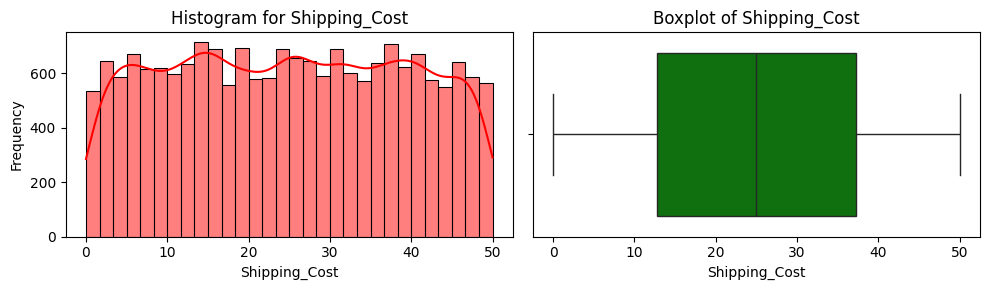

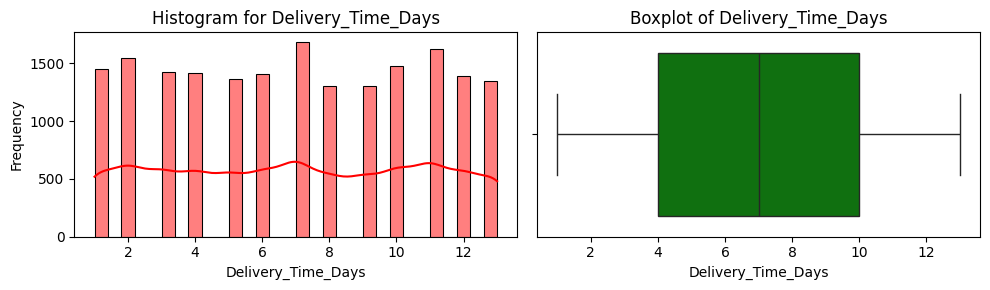

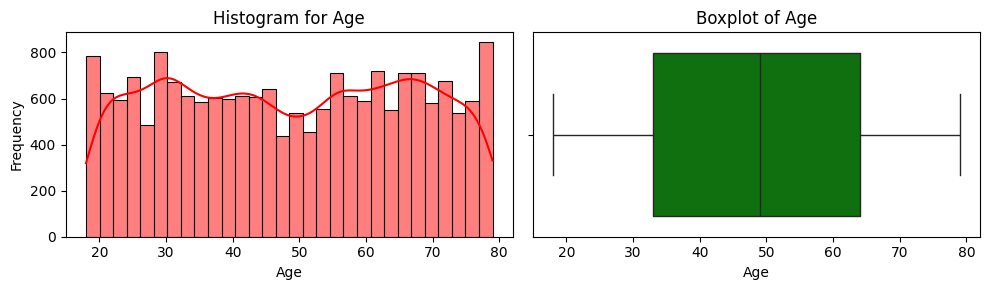

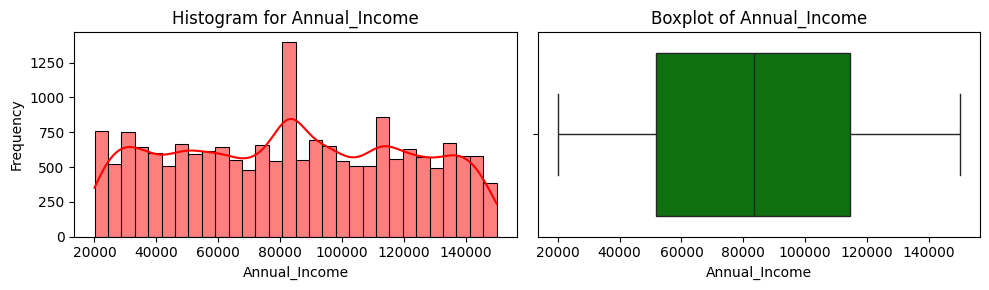

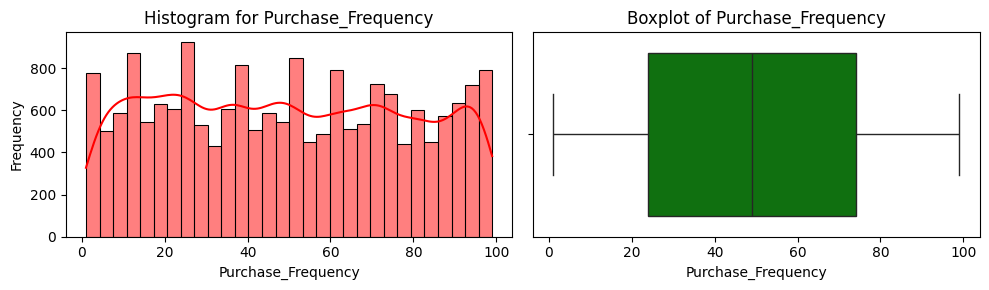

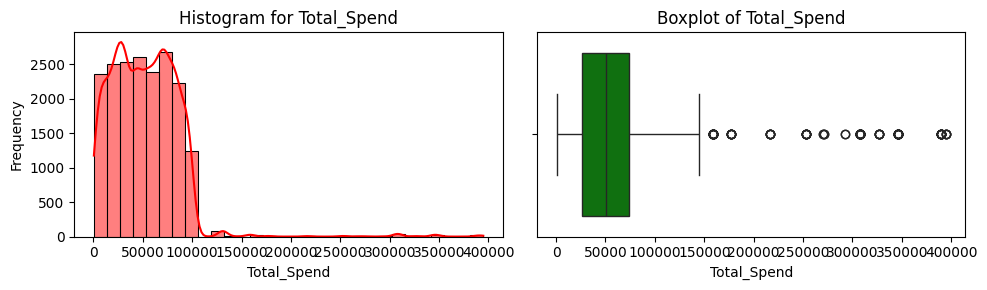

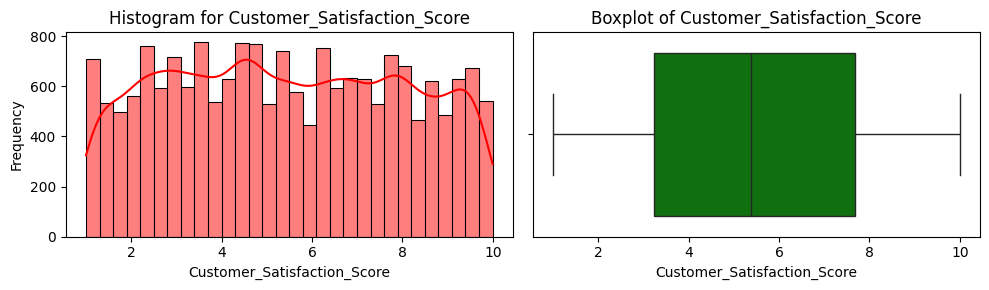

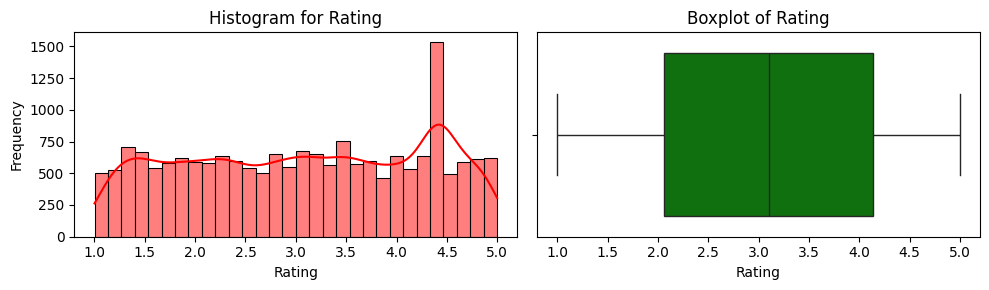

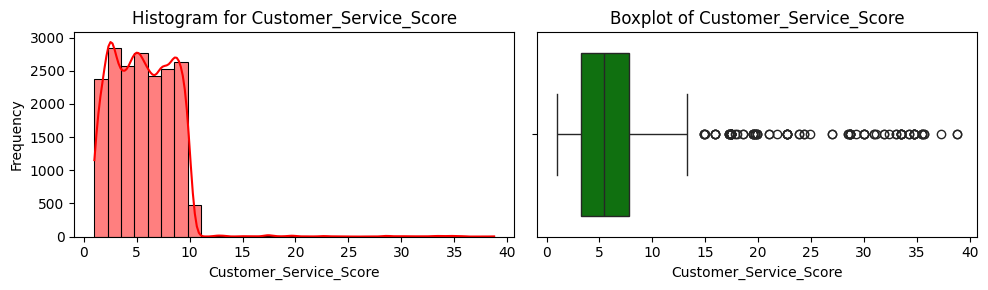

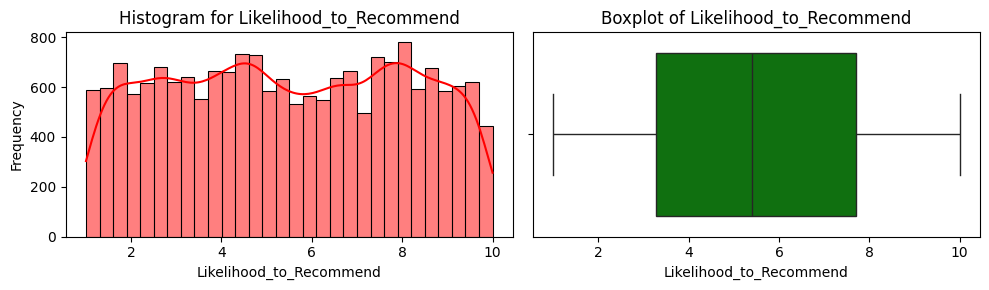

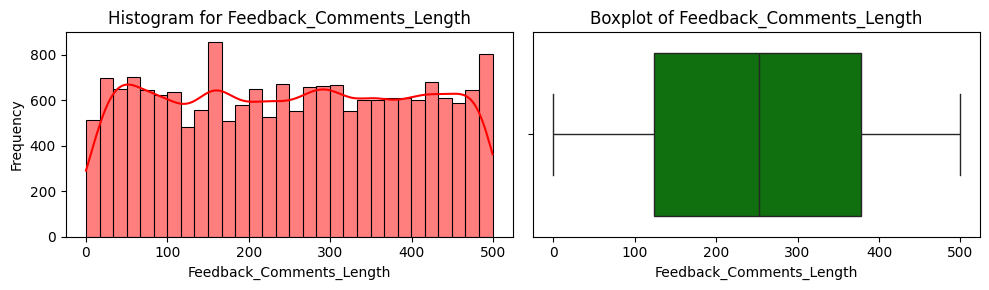

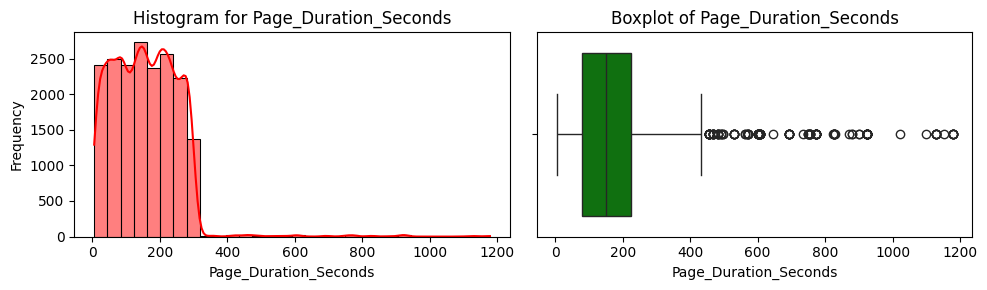

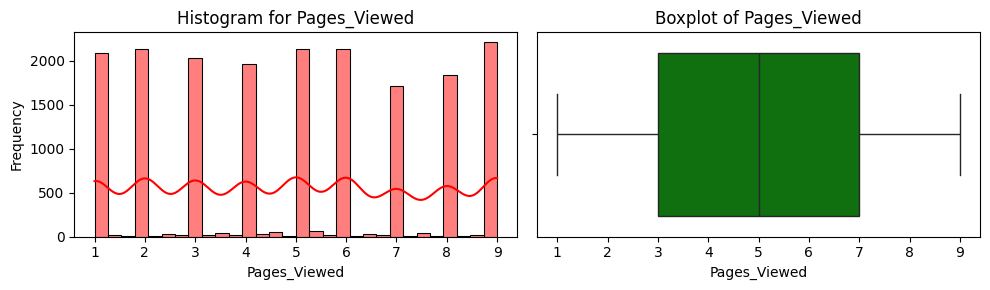

In [26]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # Histogram with KDE
    sns.histplot(df[col], kde=True, bins=30, edgecolor='black', color='red', ax=axes[0])
    axes[0].set_title(f'Histogram for {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='green')
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


In [27]:
# Clumns that contain 'Date' in their name
date_cols = [col for col in df.columns if 'Date' in col]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_cols].dtypes

Sales_Date       datetime64[ns]
Purchase_Date    datetime64[ns]
Feedback_Date    datetime64[ns]
dtype: object

In [28]:
# List of categorical columns
categorical_cols = df.select_dtypes('O').columns
len(categorical_cols)

17

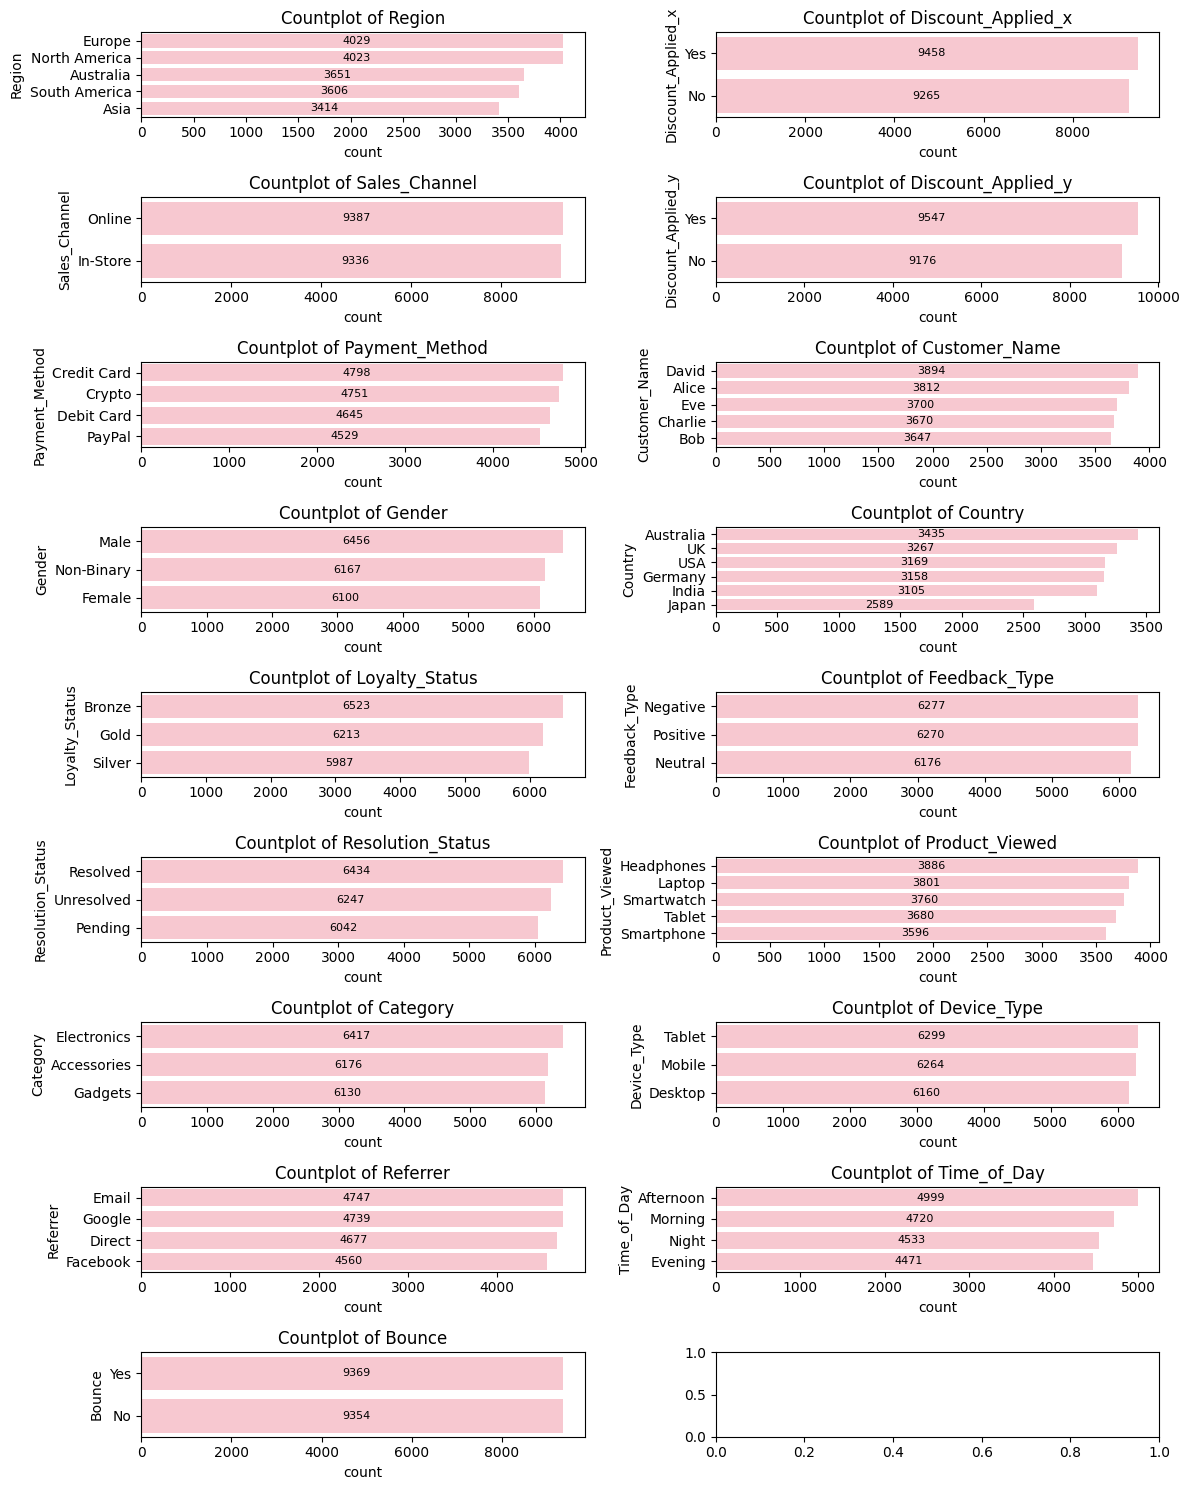

In [29]:
fig, axes = plt.subplots(9, 2, figsize=(12, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i], color='pink')
    ax.bar_label(ax.containers[0], label_type='center', padding=3, fontsize=8)
    ax.set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

# Bi-Variate Exploratory Analysis

In [30]:
# Helper function to customize the plot
def customize_plot(ax, title, label_degree=90, tick_degree=0):
    """Add vertical bar labels at the center of each bar and rotate tick labels."""
    if hasattr(ax, 'containers'):  # Check if the axis has containers (bar plots)
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', label_type='center', padding=3, rotation=label_degree, fontsize=10)
    tick_labels = [label.get_text() for label in ax.get_xticklabels()]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(tick_labels, rotation=tick_degree)
    ax.set_title(title)

## Sales EDA

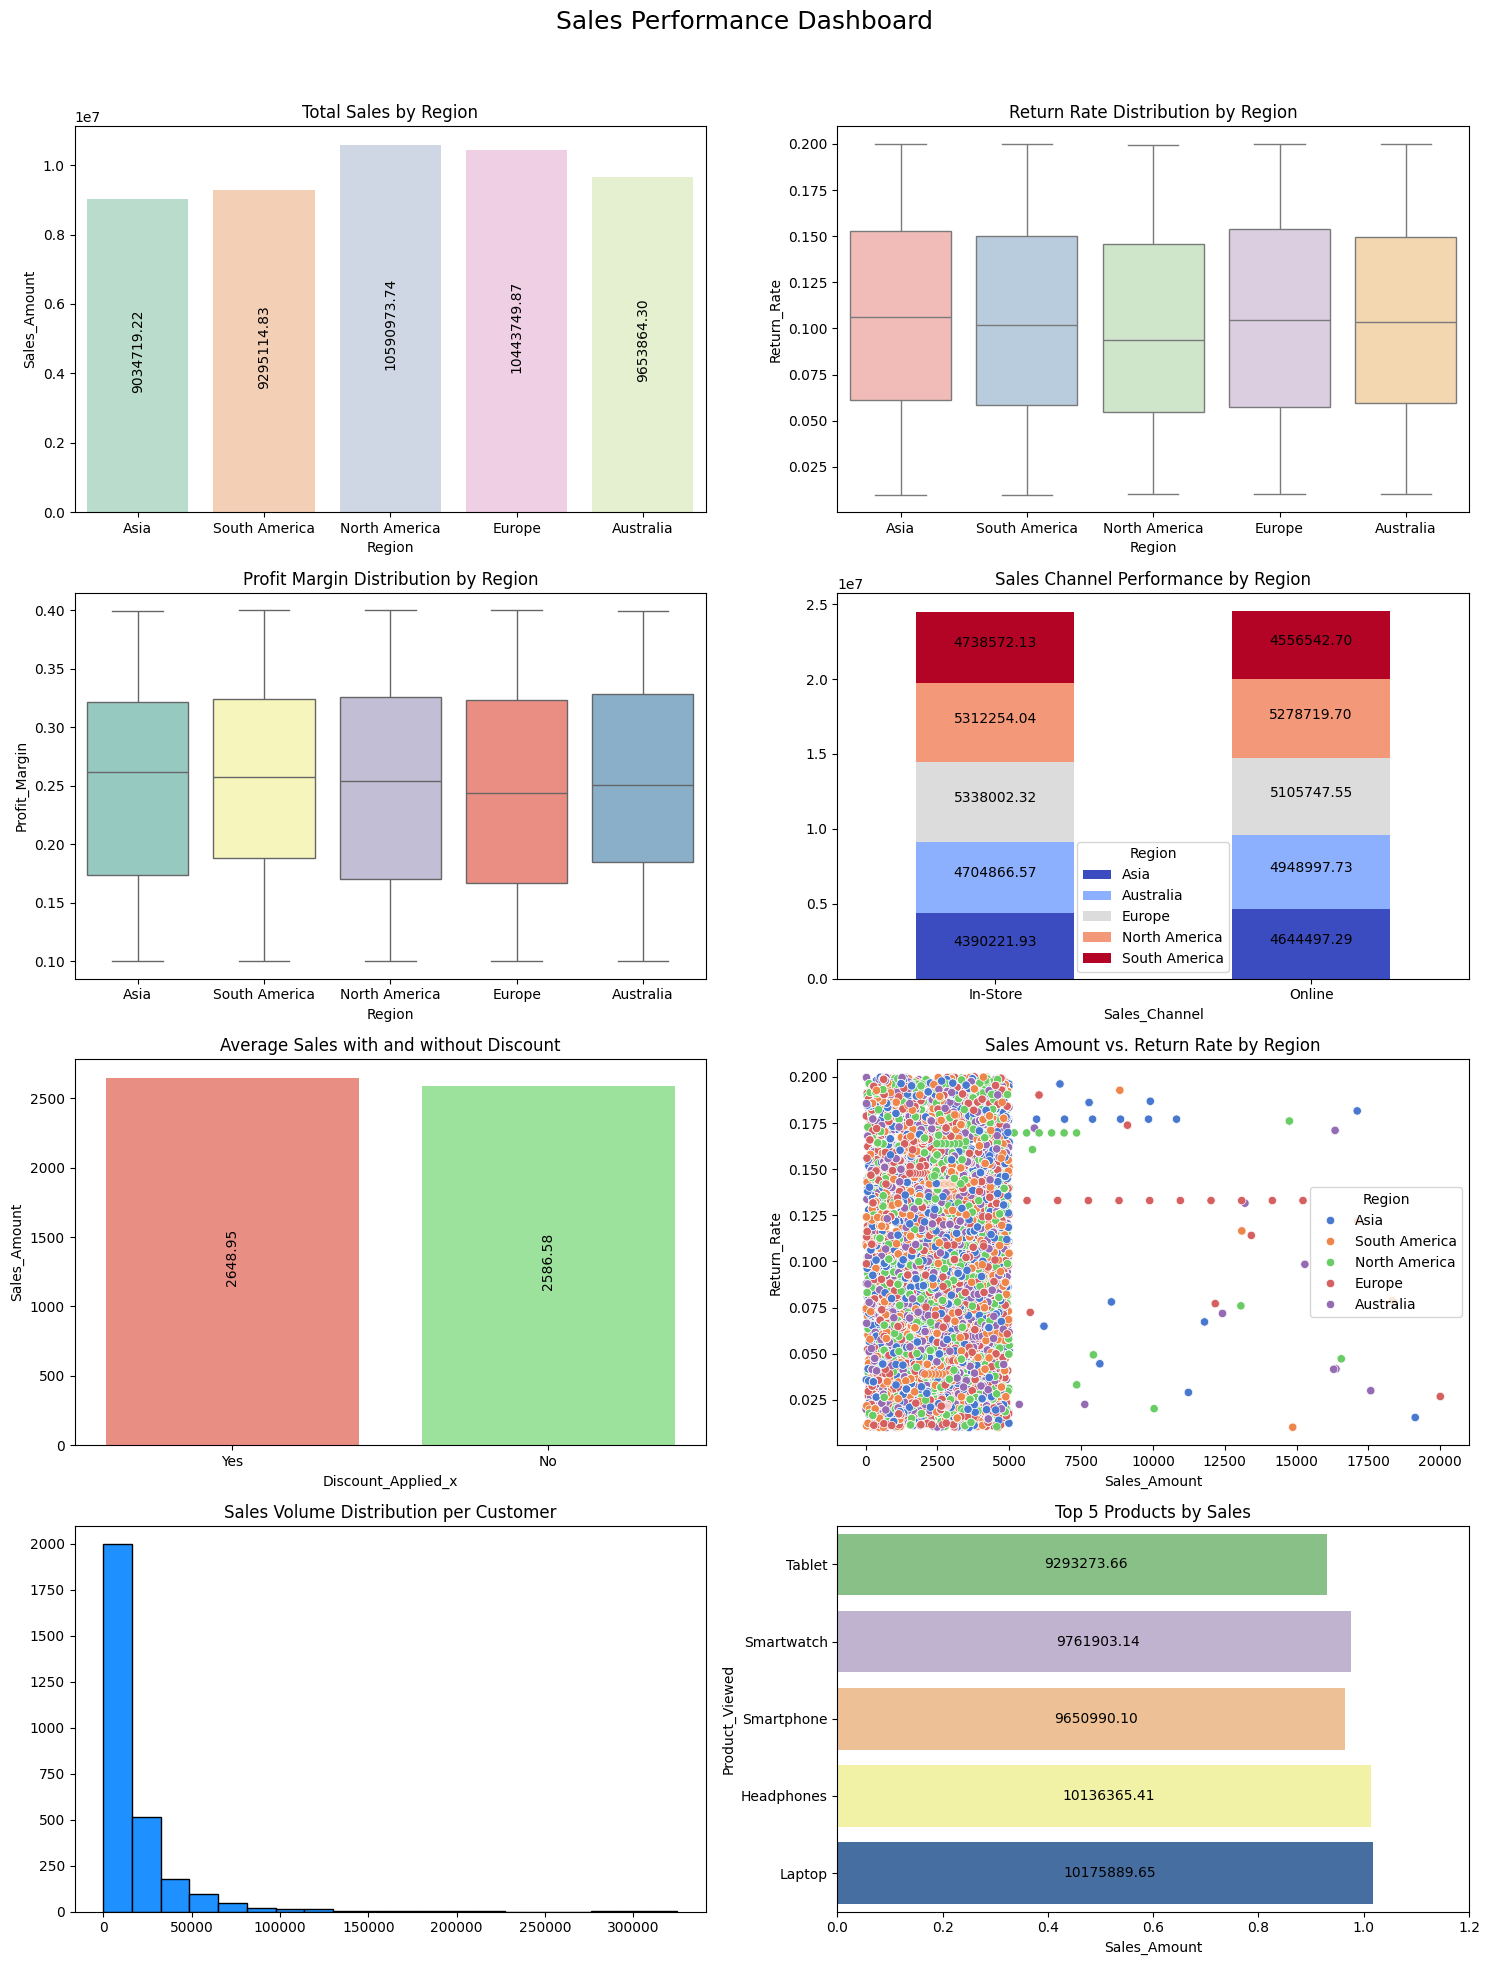

In [31]:
# Setting up the figure size and layout for the dashboard
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Sales Performance Dashboard', fontsize=18)

# 1. Region-wise Sales Analysis
sns.barplot(x='Region', y='Sales_Amount', data=df, hue='Region', estimator=sum, errorbar=None, ax=axs[0, 0], palette='Pastel2')
customize_plot(axs[0, 0], "Total Sales by Region")

# 2. Region-wise Return Rate Distribution
sns.boxplot(x='Region', y='Return_Rate', data=df, hue='Region', ax=axs[0, 1], palette="Pastel1")
axs[0, 1].set_title("Return Rate Distribution by Region")

# 3. Profit Margin Distribution by Region
sns.boxplot(x='Region', y='Profit_Margin', data=df, hue='Region', ax=axs[1, 0], palette="Set3")
axs[1, 0].set_title("Profit Margin Distribution by Region")

# 4. Sales Channel Performance by Region
channel_region_sales = df.groupby(['Sales_Channel', 'Region'])['Sales_Amount'].sum().unstack()
channel_region_sales.plot(kind='bar', stacked=True, ax=axs[1, 1], colormap="coolwarm")
customize_plot(axs[1, 1], "Sales Channel Performance by Region", 0)

# 5. Discount Effect on Sales (with vs. without discount)
sns.barplot(x='Discount_Applied_x', y='Sales_Amount', data=df, hue='Discount_Applied_x', estimator='mean', errorbar=None, ax=axs[2, 0], palette=['salmon', 'lightgreen'])
customize_plot(axs[2, 0], "Average Sales with and without Discount")

# 6. Return Rate vs. Sales Amount by Region
sns.scatterplot(x='Sales_Amount', y='Return_Rate', hue='Region', data=df, ax=axs[2, 1], palette="muted")
axs[2, 1].set_title("Sales Amount vs. Return Rate by Region")

# 7. Customer Segmentation: Sales Volume Distribution per Customer
axs[3, 0].hist(df.groupby('Customer_ID')['Sales_Amount'].sum(), bins=20, color='dodgerblue', edgecolor='black')
axs[3, 0].set_title("Sales Volume Distribution per Customer")

# 8. Product Performance (Top Product by Sales)
sns.barplot(x='Sales_Amount', y='Product_Viewed', data=df[df['Product_Viewed'].isin(
    df.groupby('Product_Viewed')['Sales_Amount'].sum().nlargest(5).index)],
    ax=axs[3, 1], hue='Product_Viewed', palette='Accent', estimator=sum, errorbar=None)
customize_plot(axs[3, 1], "Top 5 Products by Sales", 0)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusting layout to fit the title
plt.show()

## Purchase EDA

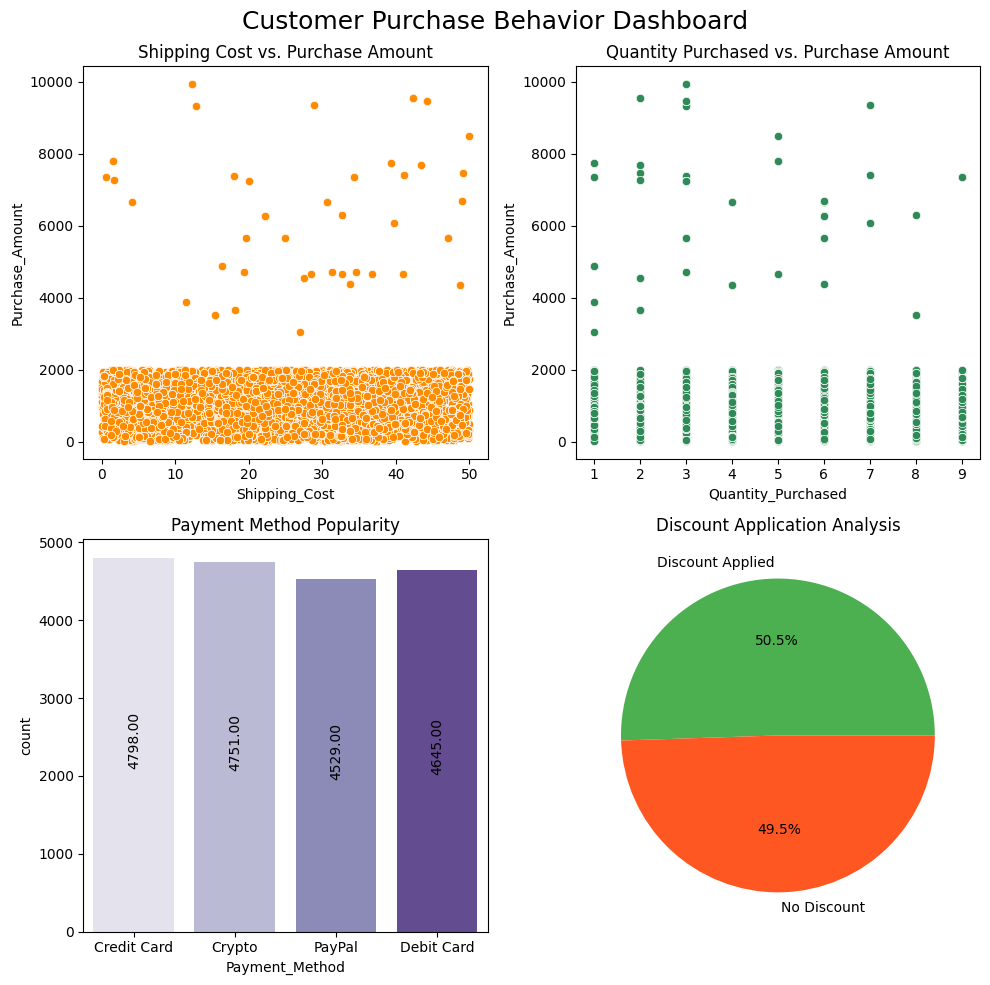

In [32]:
# Setting up the dashboard layout with subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Customer Purchase Behavior Dashboard', fontsize=18)

# 1. Shipping Cost vs. Purchase Amount (Scatter Plot)
sns.scatterplot(x='Shipping_Cost', y='Purchase_Amount', data=df, ax=ax[0, 0], color='darkorange')
ax[0, 0].set_title('Shipping Cost vs. Purchase Amount')

# 2. Payment Method Popularity (Bar Plot)
sns.countplot(data=df, x='Payment_Method', hue='Payment_Method', ax=ax[1, 0], palette='Purples')
customize_plot(ax[1, 0], 'Payment Method Popularity')  # Customize bar plot labels

# 3. Discount Application Analysis (Pie Chart)
discount_counts = df['Discount_Applied_x'].value_counts()
ax[1, 1].pie(discount_counts, labels=['Discount Applied', 'No Discount'], autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'])
ax[1, 1].set_title('Discount Application Analysis')

# 4. Quantity Purchased vs. Purchase Amount (Scatter Plot)
sns.scatterplot(x='Quantity_Purchased', y='Purchase_Amount', data=df, ax=ax[0, 1], color='seagreen')
ax[0, 1].set_title('Quantity Purchased vs. Purchase Amount')

plt.tight_layout()
plt.show()

## Feedback EDA

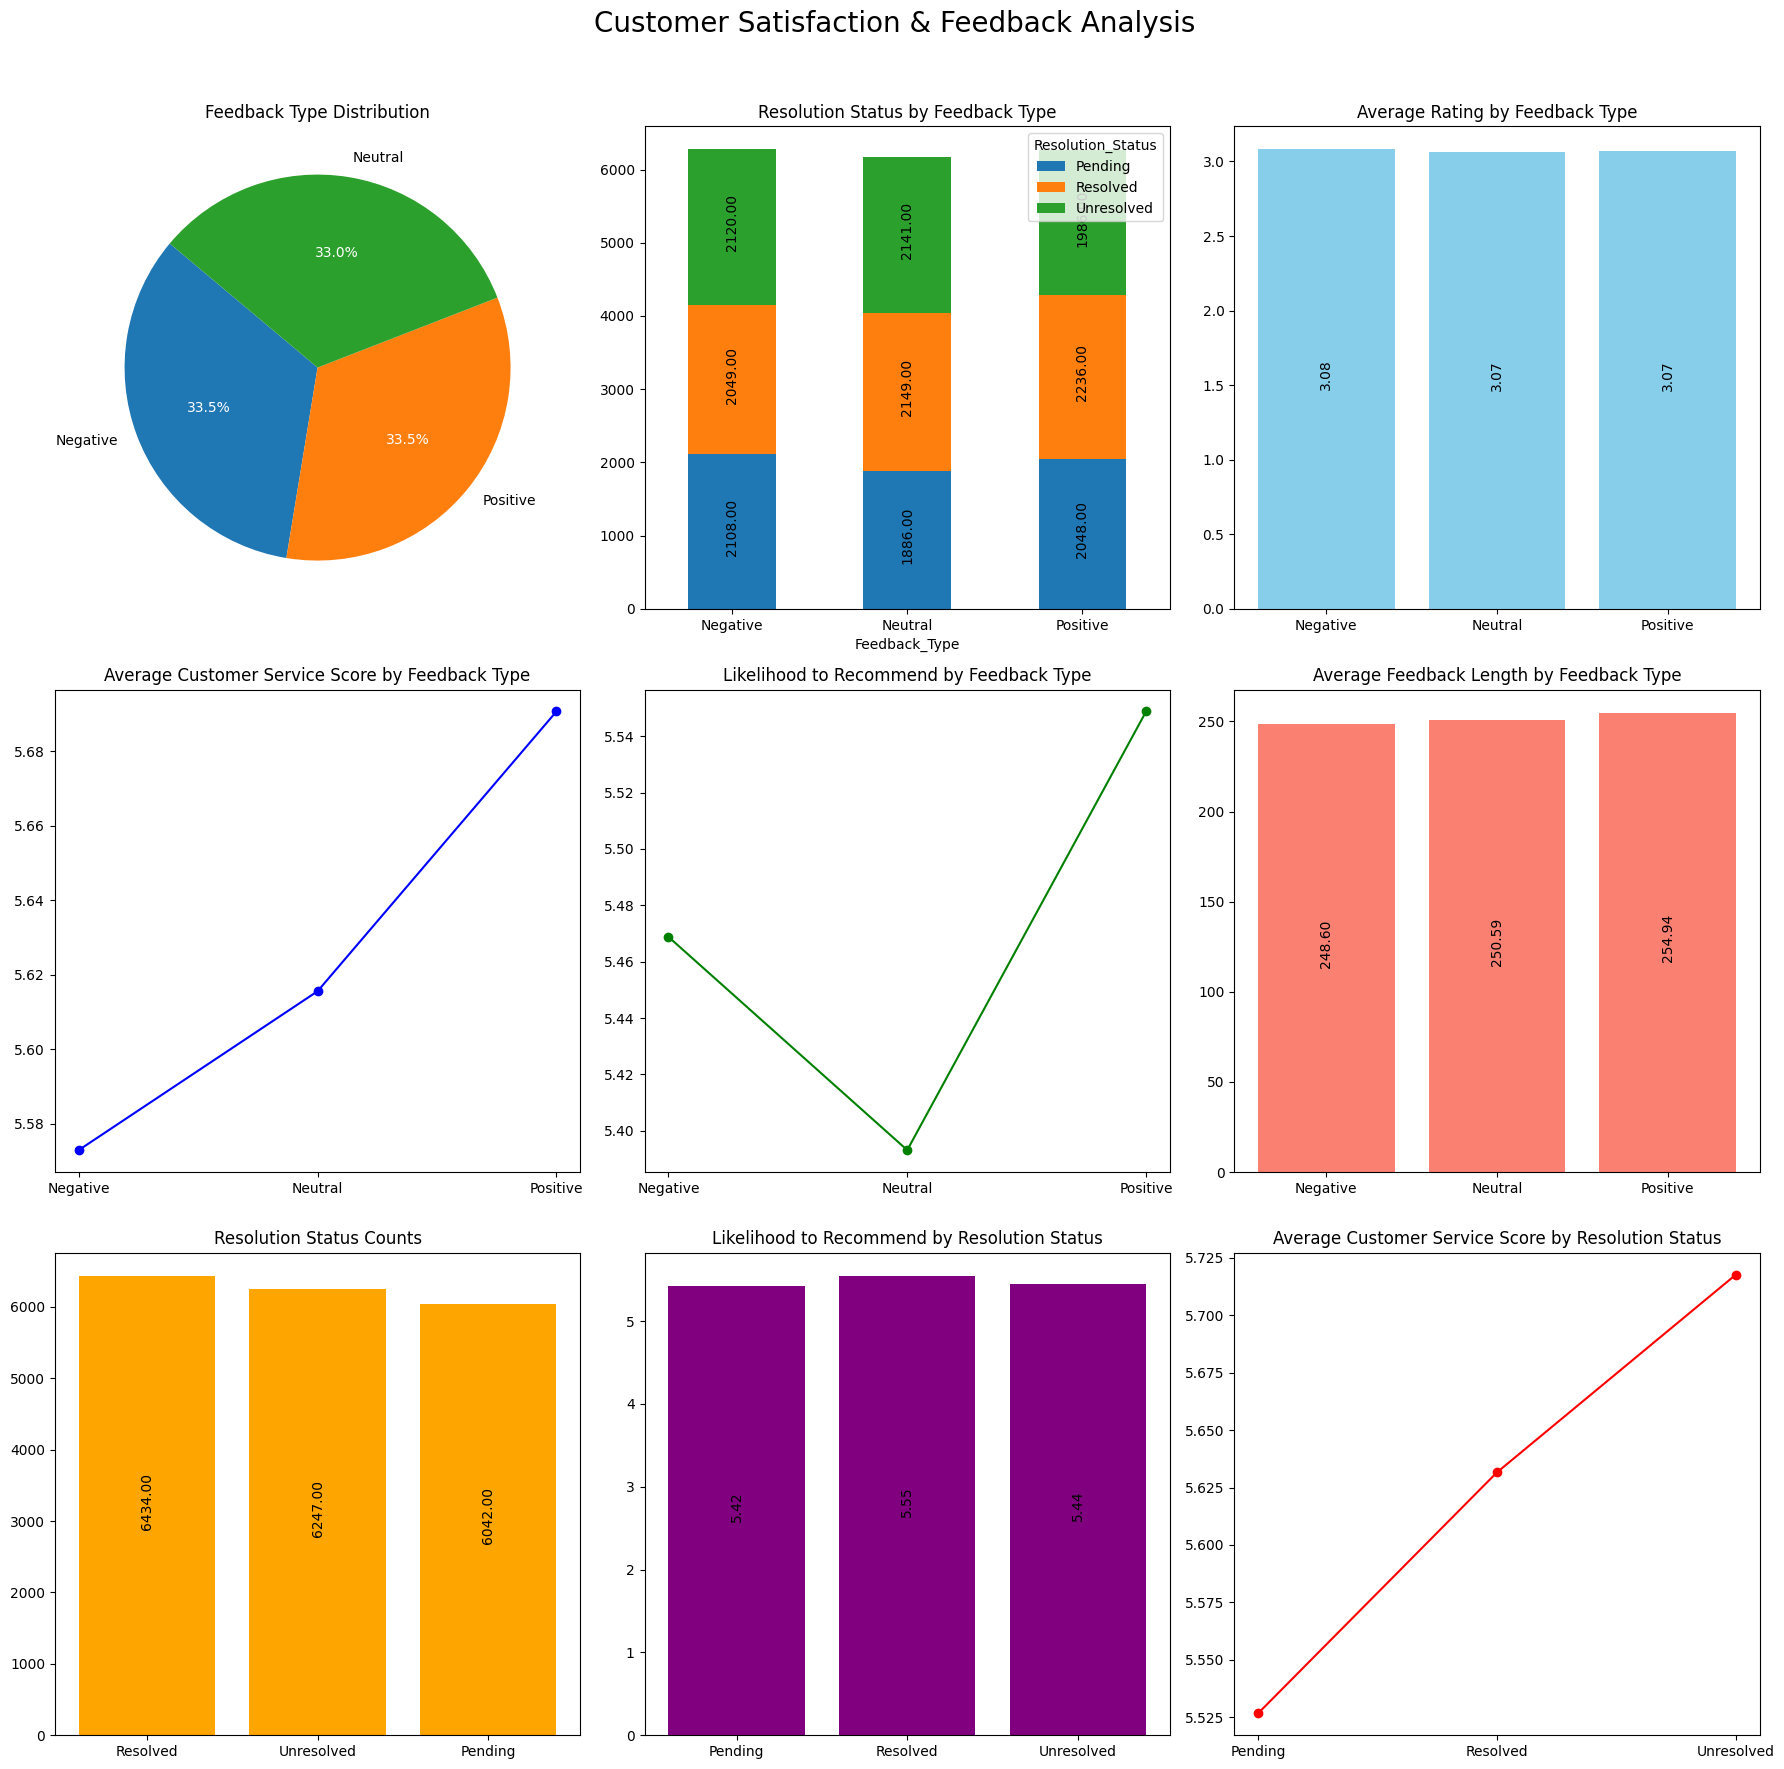

In [33]:
# Setting up the figure size and layout for the dashboard
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Customer Satisfaction & Feedback Analysis", fontsize=20)

# 1. Feedback Type Distribution (Pie Chart)
feedback_counts = df['Feedback_Type'].value_counts()
wedges, texts, autotexts = axs[0, 0].pie(feedback_counts, labels=feedback_counts.index, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('white')
customize_plot(axs[0, 0], "Feedback Type Distribution")

# 2. Resolution Status by Feedback Type (Stacked Bar Plot)
resolution_by_feedback = df.groupby(['Feedback_Type', 'Resolution_Status']).size().unstack()
bars = resolution_by_feedback.plot(kind='bar', stacked=True, ax=axs[0, 1])
customize_plot(axs[0, 1], "Resolution Status by Feedback Type")

# 3. Average Rating by Feedback Type (Bar Plot)
avg_rating_by_feedback = df.groupby('Feedback_Type')['Rating'].mean()
bars = axs[0, 2].bar(avg_rating_by_feedback.index, avg_rating_by_feedback.values, color='skyblue')
customize_plot(axs[0, 2], "Average Rating by Feedback Type")

# 4. Customer Service Score by Feedback Type (Point Plot)
avg_service_score = df.groupby('Feedback_Type')['Customer_Service_Score'].mean()
axs[1, 0].plot(avg_service_score.index, avg_service_score.values, marker='o', linestyle='-', color='blue')
customize_plot(axs[1, 0], "Average Customer Service Score by Feedback Type")

# 5. Likelihood to Recommend by Feedback Type (Point Plot)
avg_recommend_score = df.groupby('Feedback_Type')['Likelihood_to_Recommend'].mean()
axs[1, 1].plot(avg_recommend_score.index, avg_recommend_score.values, marker='o', linestyle='-', color='green')
customize_plot(axs[1, 1], "Likelihood to Recommend by Feedback Type")

# 6. Average Feedback Length by Feedback Type (Bar Plot)
avg_feedback_length = df.groupby('Feedback_Type')['Feedback_Comments_Length'].mean()
bars = axs[1, 2].bar(avg_feedback_length.index, avg_feedback_length.values, color='salmon')
customize_plot(axs[1, 2], "Average Feedback Length by Feedback Type")

# 7. Resolution Status Counts (Bar Plot)
resolution_counts = df['Resolution_Status'].value_counts()
bars = axs[2, 0].bar(resolution_counts.index, resolution_counts.values, color='orange')
customize_plot(axs[2, 0], "Resolution Status Counts")

# 8. Likelihood to Recommend by Resolution Status (Bar Plot)
recommend_by_resolution = df.groupby('Resolution_Status')['Likelihood_to_Recommend'].mean()
bars = axs[2, 1].bar(recommend_by_resolution.index, recommend_by_resolution.values, color='purple')
customize_plot(axs[2, 1], "Likelihood to Recommend by Resolution Status")

# 9. Average Customer Service Score by Resolution Status (Point Plot)
avg_service_score_by_resolution = df.groupby('Resolution_Status')['Customer_Service_Score'].mean()
axs[2, 2].plot(avg_service_score_by_resolution.index, avg_service_score_by_resolution.values, marker='o', linestyle='-', color='red')
customize_plot(axs[2, 2], "Average Customer Service Score by Resolution Status")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Customer EDA

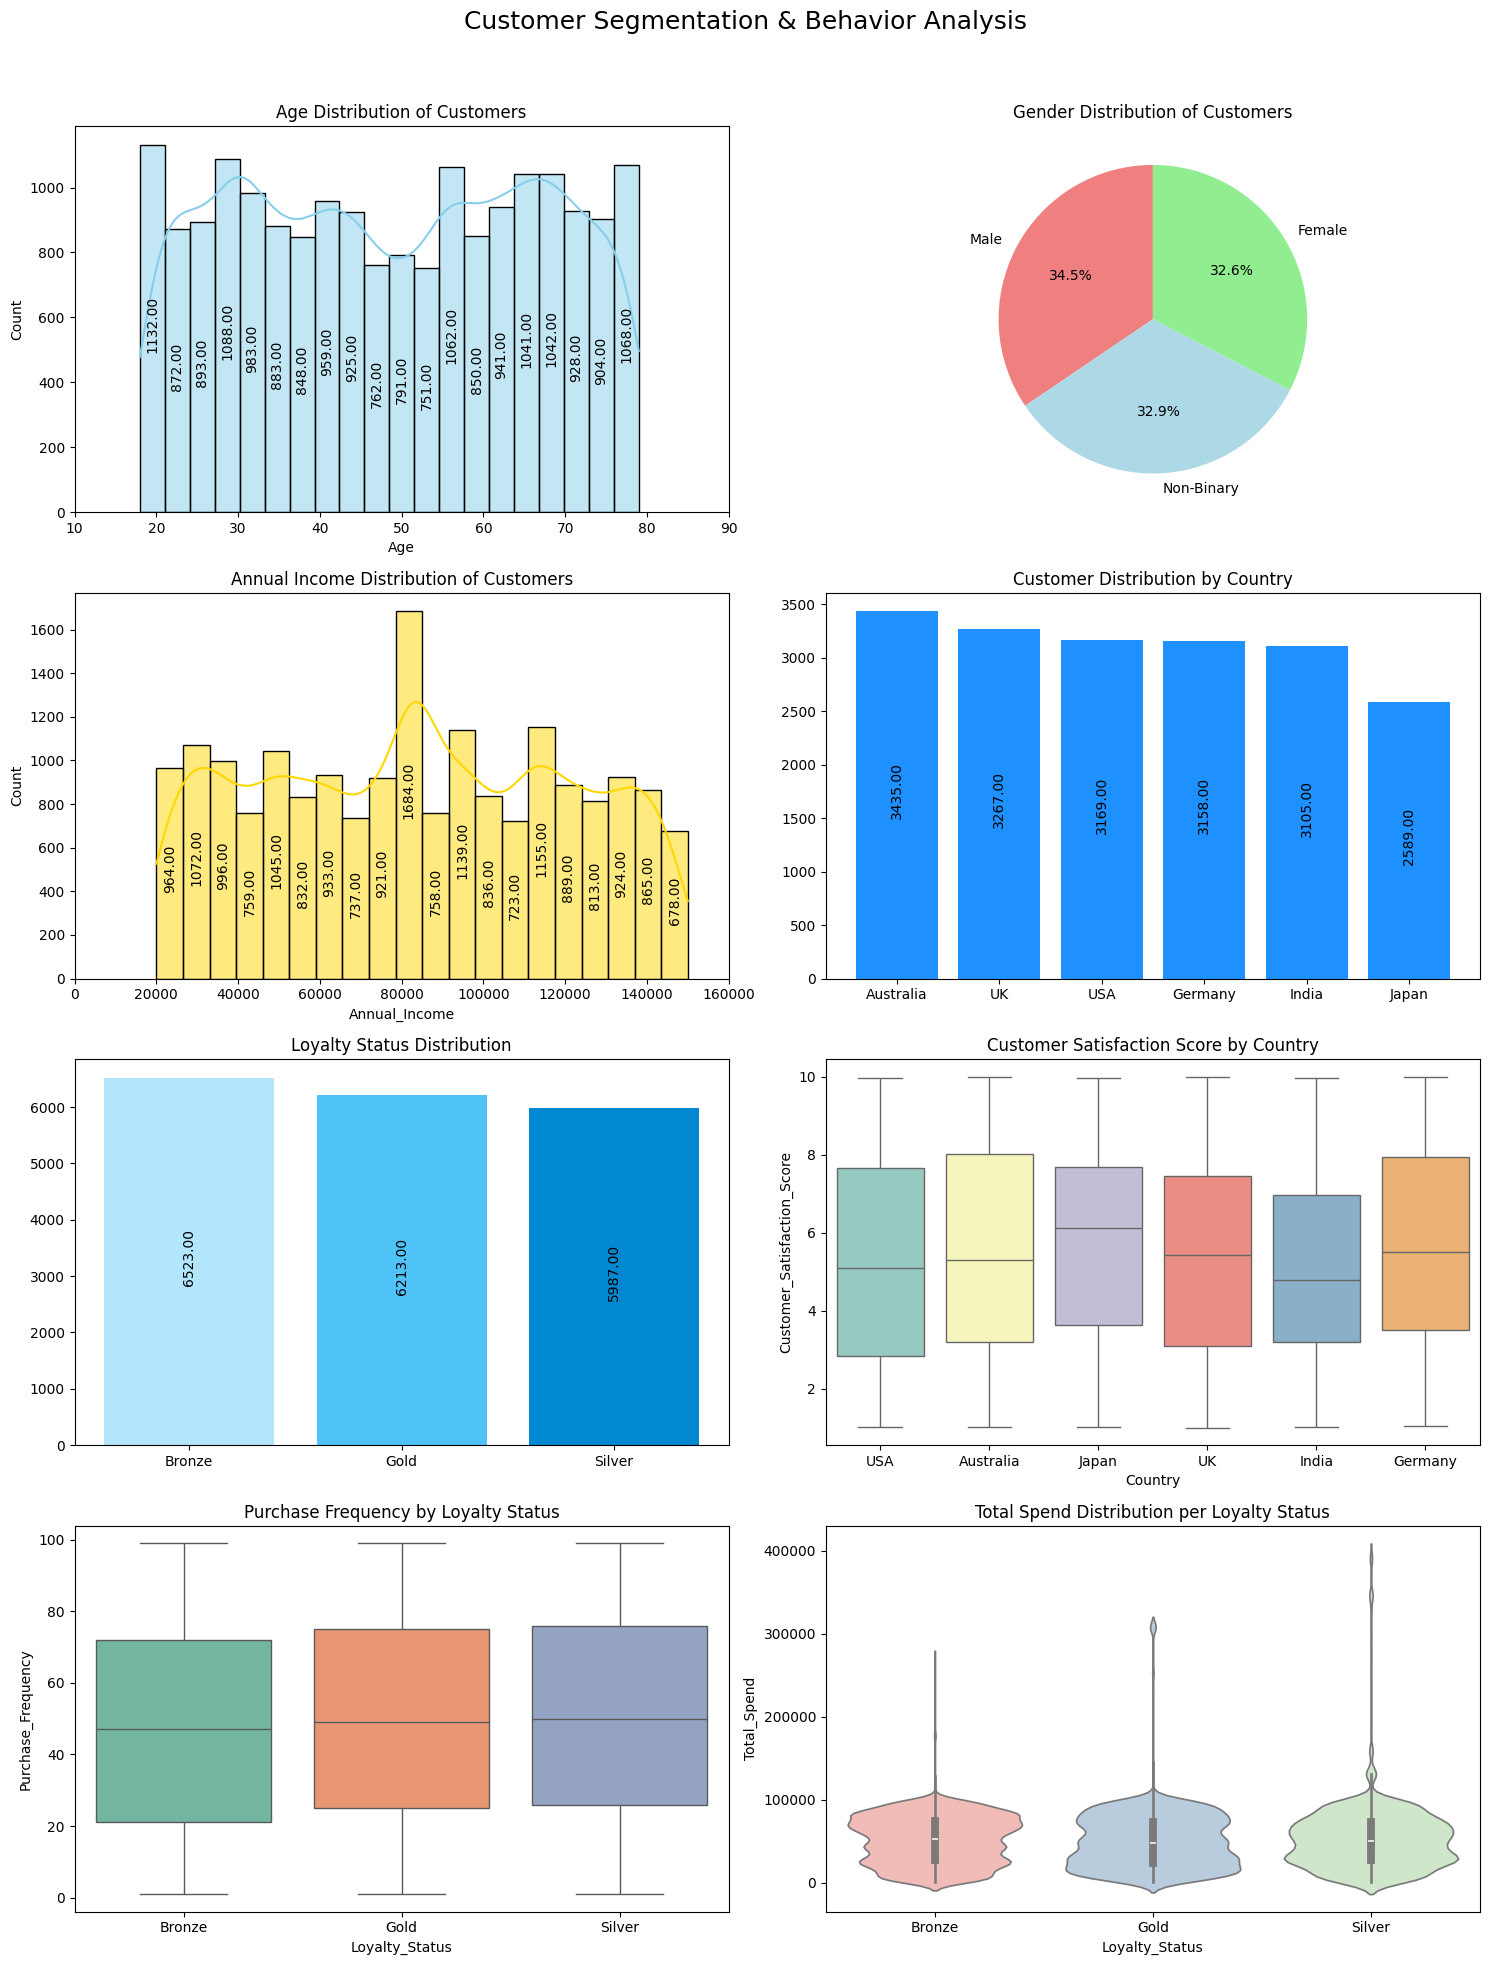

In [34]:
# Setting up the figure size and layout for the dashboard
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Customer Segmentation & Behavior Analysis', fontsize=18)

# 1. Age Distribution of Customers
sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
customize_plot(axs[0, 0], "Age Distribution of Customers")

# 2. Customer Gender Distribution
gender_counts = df['Gender'].value_counts()
axs[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
customize_plot(axs[0, 1], "Gender Distribution of Customers")

# 3. Annual Income Distribution
sns.histplot(df['Annual_Income'], bins=20, kde=True, ax=axs[1, 0], color='gold')
customize_plot(axs[1, 0], "Annual Income Distribution of Customers")

# 4. Country-wise Customer Distribution
country_counts = df['Country'].value_counts()
axs[1, 1].bar(country_counts.index, country_counts.values, color='dodgerblue')
customize_plot(axs[1, 1], "Customer Distribution by Country")

# 5. Loyalty Status Distribution
loyalty_counts = df['Loyalty_Status'].value_counts()
axs[2, 0].bar(loyalty_counts.index, loyalty_counts.values, color=['#b3e5fc', '#4fc3f7', '#0288d1'])
customize_plot(axs[2, 0], "Loyalty Status Distribution")

# 6. Customer Satisfaction Score by Country
sns.boxplot(x='Country', y='Customer_Satisfaction_Score', data=df, hue='Country', palette="Set3", ax=axs[2, 1])
axs[2, 1].set_title("Customer Satisfaction Score by Country")

# 7. Purchase Frequency by Loyalty Status
sns.boxplot(x='Loyalty_Status', y='Purchase_Frequency', data=df, hue='Loyalty_Status', palette="Set2", ax=axs[3, 0])
axs[3, 0].set_title("Purchase Frequency by Loyalty Status")

# 8. Total Spend Distribution per Loyalty Status
sns.violinplot(x='Loyalty_Status', y='Total_Spend', data=df, hue='Loyalty_Status', palette="Pastel1", ax=axs[3, 1])
customize_plot(axs[3, 1], "Total Spend Distribution per Loyalty Status")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

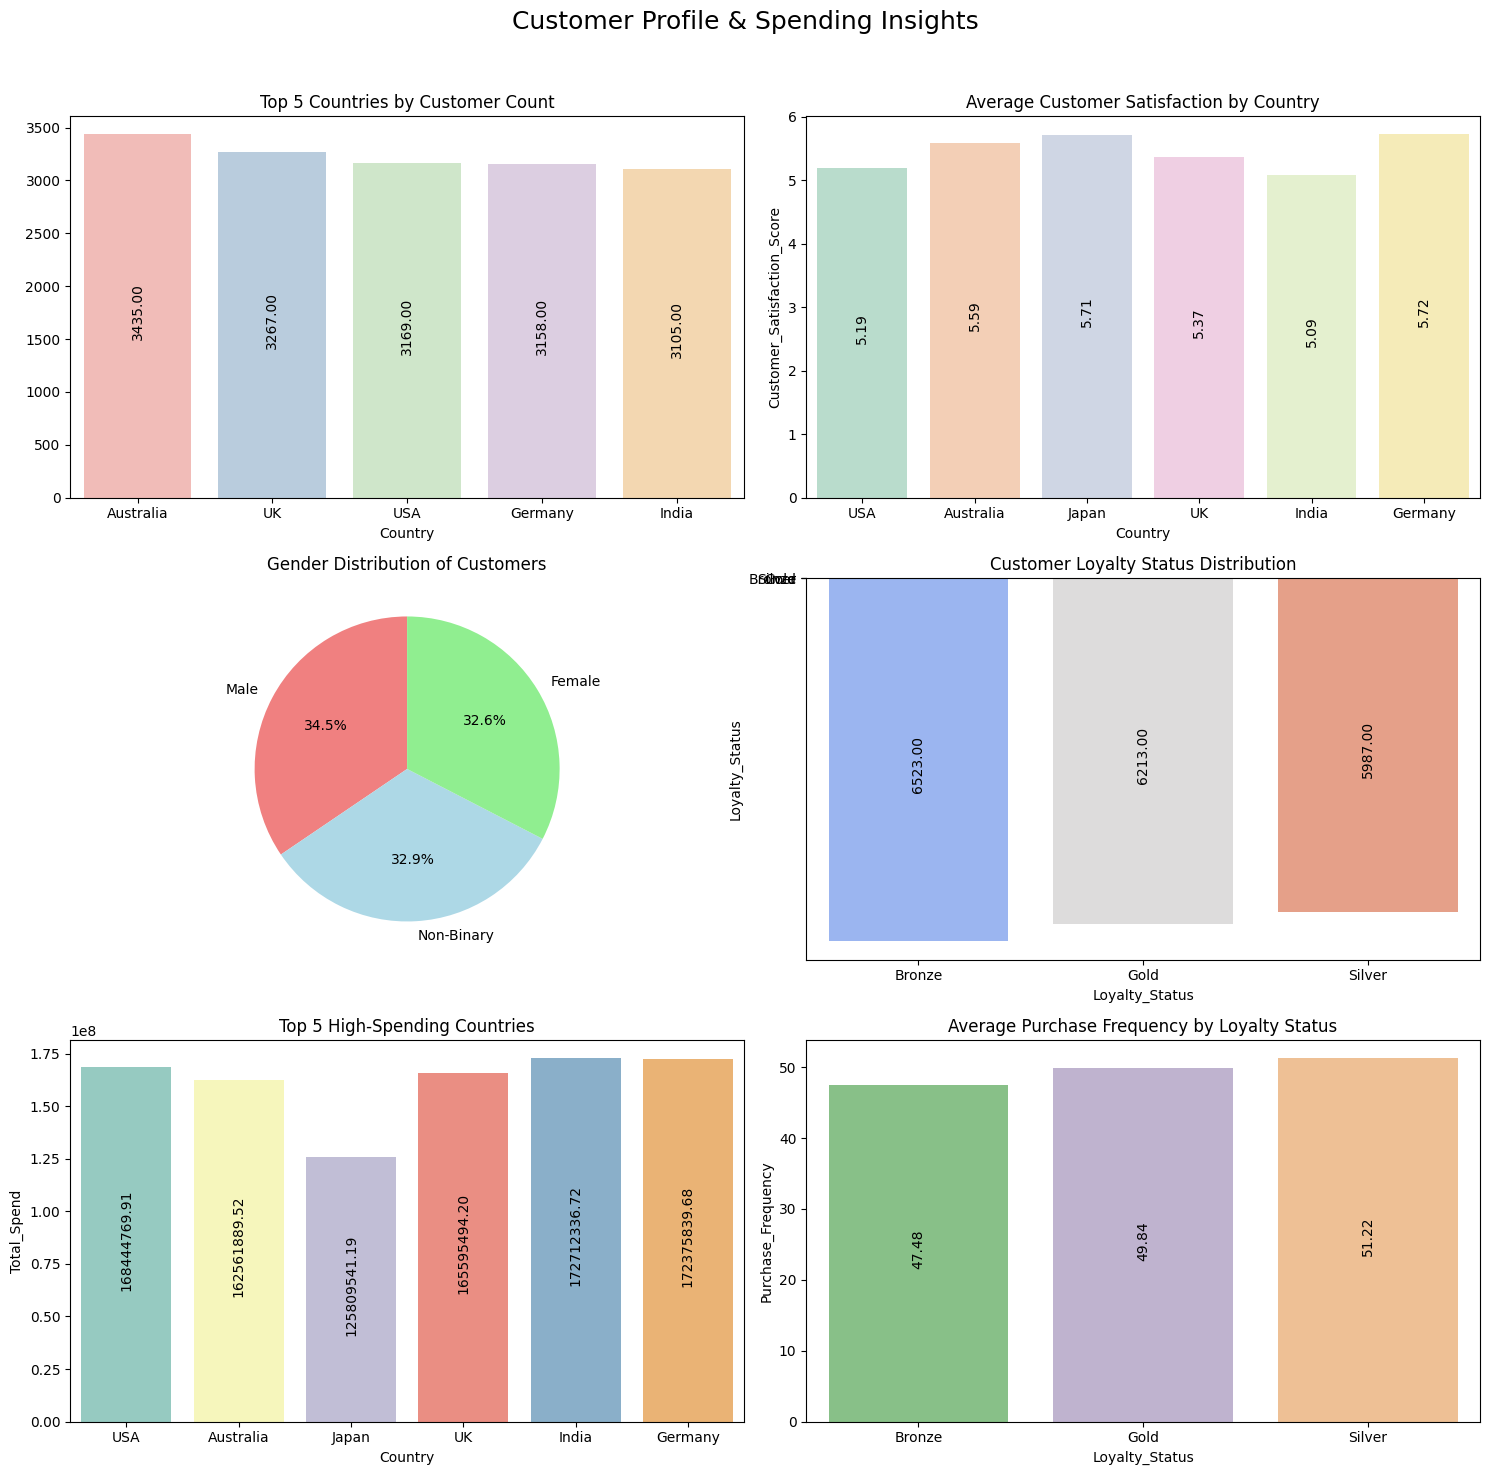

In [35]:
# Setting up the figure size and layout for the dashboard
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Customer Profile & Spending Insights', fontsize=18)

# 1. Top 5 Countries by Customer Count
top_countries = df['Country'].value_counts().nlargest(5)
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, ax=axs[0, 0], palette='Pastel1')
customize_plot(axs[0, 0], "Top 5 Countries by Customer Count")

# 2. Average Customer Satisfaction by Country
sns.barplot(x='Country', y='Customer_Satisfaction_Score', data=df, hue='Country', estimator='mean', errorbar=None, ax=axs[0, 1], palette='Pastel2')
customize_plot(axs[0, 1], "Average Customer Satisfaction by Country")

# 3. Gender Distribution of Customers
gender_counts = df['Gender'].value_counts()
axs[1, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
customize_plot(axs[1, 0], "Gender Distribution of Customers")

# 4. Customer Loyalty Status Distribution
sns.barplot(x='Loyalty_Status', y='Loyalty_Status', data=df, hue='Loyalty_Status', estimator='count', errorbar=None, ax=axs[1, 1], palette='coolwarm')
customize_plot(axs[1, 1], "Customer Loyalty Status Distribution")

# 5. Top 5 High-Spending Countries
sns.barplot(x='Country', y='Total_Spend', data=df, hue='Country', estimator='sum', errorbar=None, ax=axs[2, 0], palette='Set3')
customize_plot(axs[2, 0], "Top 5 High-Spending Countries")

# 6. Loyalty Status vs. Average Purchase Frequency
sns.barplot(x='Loyalty_Status', y='Purchase_Frequency', data=df, hue='Loyalty_Status', estimator='mean', errorbar=None, ax=axs[2, 1], palette='Accent')
customize_plot(axs[2, 1], "Average Purchase Frequency by Loyalty Status")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Web Traffic EDA

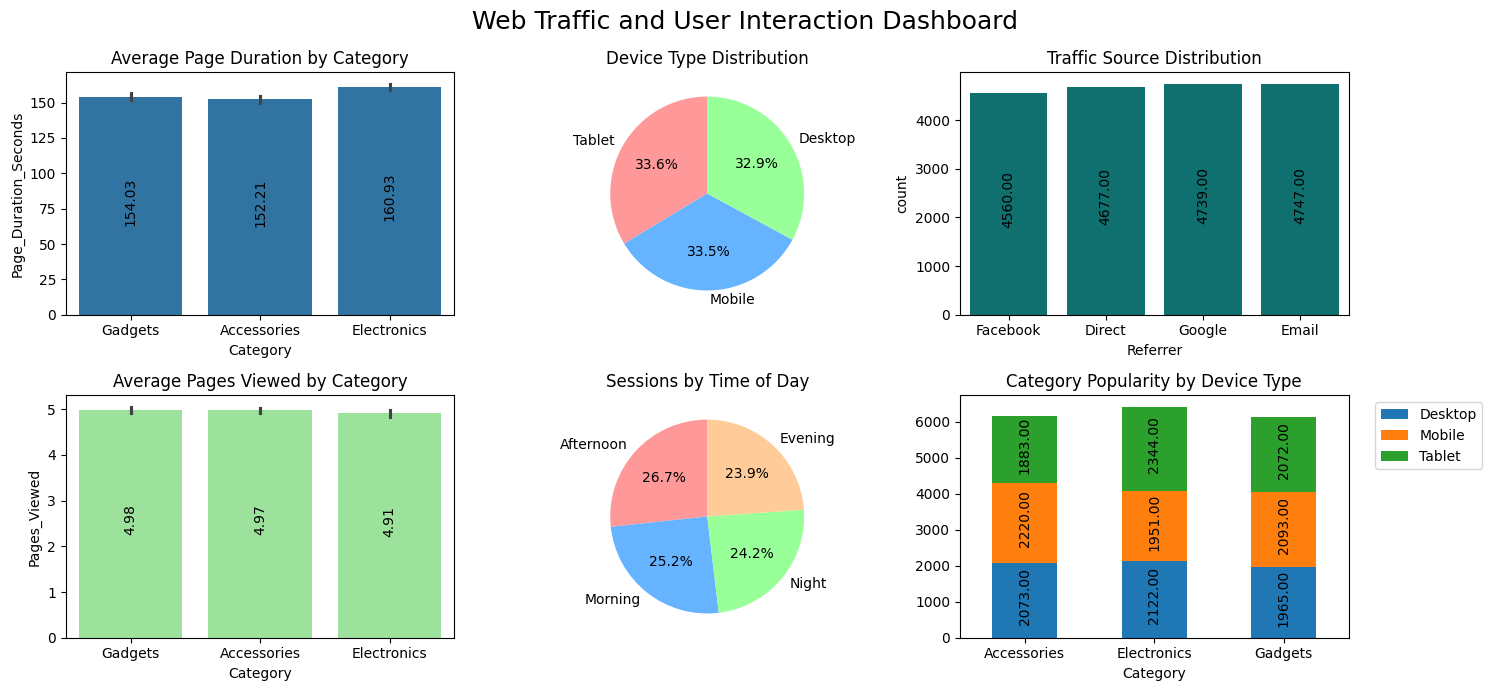

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
fig.suptitle('Web Traffic and User Interaction Dashboard', fontsize=18)

# Chart 1: Average Page Duration by Category
sns.barplot(x='Category', y='Page_Duration_Seconds', data=df, ax=axes[0, 0], estimator='mean')
customize_plot(axes[0, 0], 'Average Page Duration by Category')

# Chart 2: Device Type Distribution (Pie Chart)
device_dist = df['Device_Type'].value_counts()
axes[0, 1].pie(device_dist, labels=device_dist.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
customize_plot(axes[0, 1], 'Device Type Distribution')

# Chart 3: Traffic Source Distribution
sns.countplot(x='Referrer', data=df, ax=axes[0, 2], color='teal')
customize_plot(axes[0, 2], 'Traffic Source Distribution')

# Chart 4: Average Pages Viewed by Category
sns.barplot(x='Category', y='Pages_Viewed', data=df, ax=axes[1, 0], estimator='mean', color='lightgreen')
customize_plot(axes[1, 0], 'Average Pages Viewed by Category')

# Chart 5: Sessions by Time of Day (Pie Chart)
time_of_day_counts = df['Time_of_Day'].value_counts()
axes[1, 1].pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
customize_plot(axes[1, 1], 'Sessions by Time of Day')

# Chart 6: Category Popularity by Device Type (Stacked Bar Chart)
category_device_popularity = pd.crosstab(df['Category'], df['Device_Type'])
category_device_popularity.plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
customize_plot(axes[1, 2], 'Category Popularity by Device Type')

plt.tight_layout()
plt.show()

In [37]:
df['Bounce'] = df['Bounce'].map({'Yes': True, 'No': False})

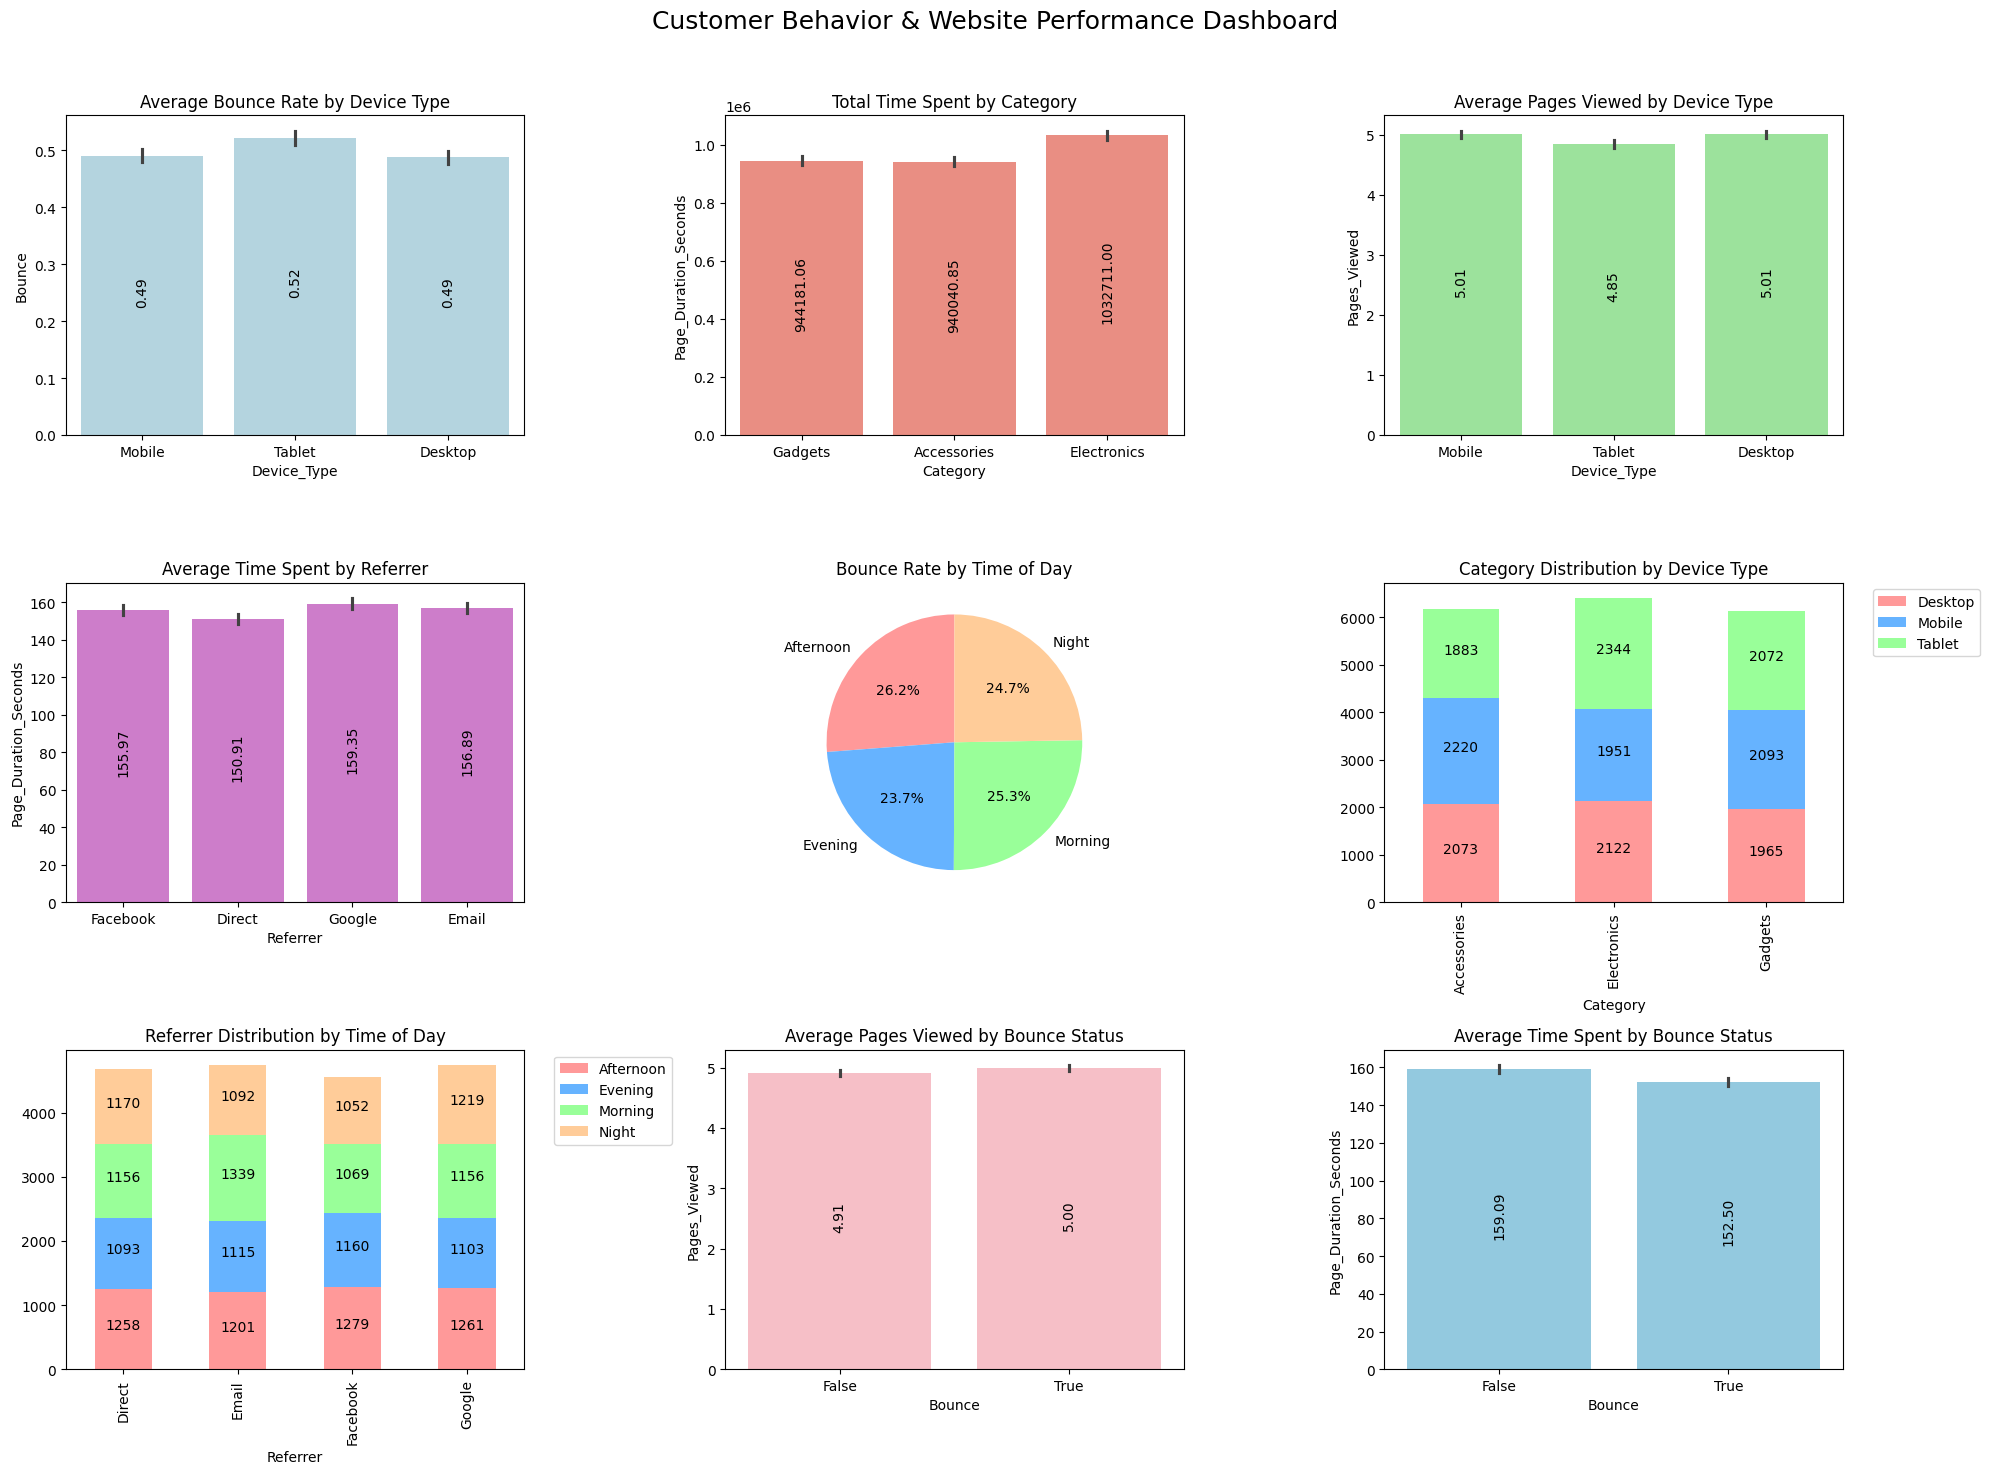

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Customer Behavior & Website Performance Dashboard', fontsize=18)

# Chart 1: Average Bounce Rate by Device Type
sns.barplot(x='Device_Type', y='Bounce', data=df, estimator='mean', ax=axes[0, 0], color='lightblue')
customize_plot(axes[0, 0], 'Average Bounce Rate by Device Type')

# Chart 2: Total Time Spent on Website by Category
sns.barplot(x='Category', y='Page_Duration_Seconds', data=df, estimator='sum', ax=axes[0, 1], color='salmon')
customize_plot(axes[0, 1], 'Total Time Spent by Category')

# Chart 3: Average Pages Viewed by Device Type
sns.barplot(x='Device_Type', y='Pages_Viewed', data=df, estimator='mean', ax=axes[0, 2], color='lightgreen')
customize_plot(axes[0, 2], 'Average Pages Viewed by Device Type')

# Chart 4: Average Time Spent on Website by Referrer
sns.barplot(x='Referrer', y='Page_Duration_Seconds', data=df, estimator='mean', ax=axes[1, 0], color='orchid')
customize_plot(axes[1, 0], 'Average Time Spent by Referrer')

# Chart 5: Bounce Rate by Time of Day (Pie Chart)
bounce_rate_time = df[df['Bounce'] == True].groupby('Time_of_Day').size() / df.groupby('Time_of_Day').size() * 100
axes[1, 1].pie(bounce_rate_time.values, labels=bounce_rate_time.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1, 1].set_title('Bounce Rate by Time of Day')

# Chart 6: Category Distribution by Device Type (Stacked Bar Chart)
category_device_dist = pd.crosstab(df['Category'], df['Device_Type'])
category_device_dist.plot(kind='bar', stacked=True, ax=axes[1, 2], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1, 2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for container in axes[1, 2].containers: axes[1, 2].bar_label(container, fmt='%d', label_type='center', padding=3, fontsize=10)
axes[1, 2].set_title('Category Distribution by Device Type')

# Chart 7: Referrer Distribution by Time of Day (Stacked Bar Chart)
referrer_time_dist = df.groupby(['Referrer', 'Time_of_Day'])['Session_ID'].count().unstack()
referrer_time_dist.plot(kind='bar', stacked=True, ax=axes[2, 0], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[2, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for container in axes[2, 0].containers: axes[2, 0].bar_label(container, fmt='%d', label_type='center', padding=3, fontsize=10)
axes[2, 0].set_title('Referrer Distribution by Time of Day')

# Chart 8: Average Pages Viewed by Bounce Status
sns.barplot(x='Bounce', y='Pages_Viewed', data=df, estimator='mean', ax=axes[2, 1], color='lightpink')
customize_plot(axes[2, 1], 'Average Pages Viewed by Bounce Status')

# Chart 9: Average Time Spent on Website by Bounce Status
sns.barplot(x='Bounce', y='Page_Duration_Seconds', data=df, estimator='mean', ax=axes[2, 2], color='skyblue')
customize_plot(axes[2, 2], 'Average Time Spent by Bounce Status')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Feature Selection & Feature Engineering

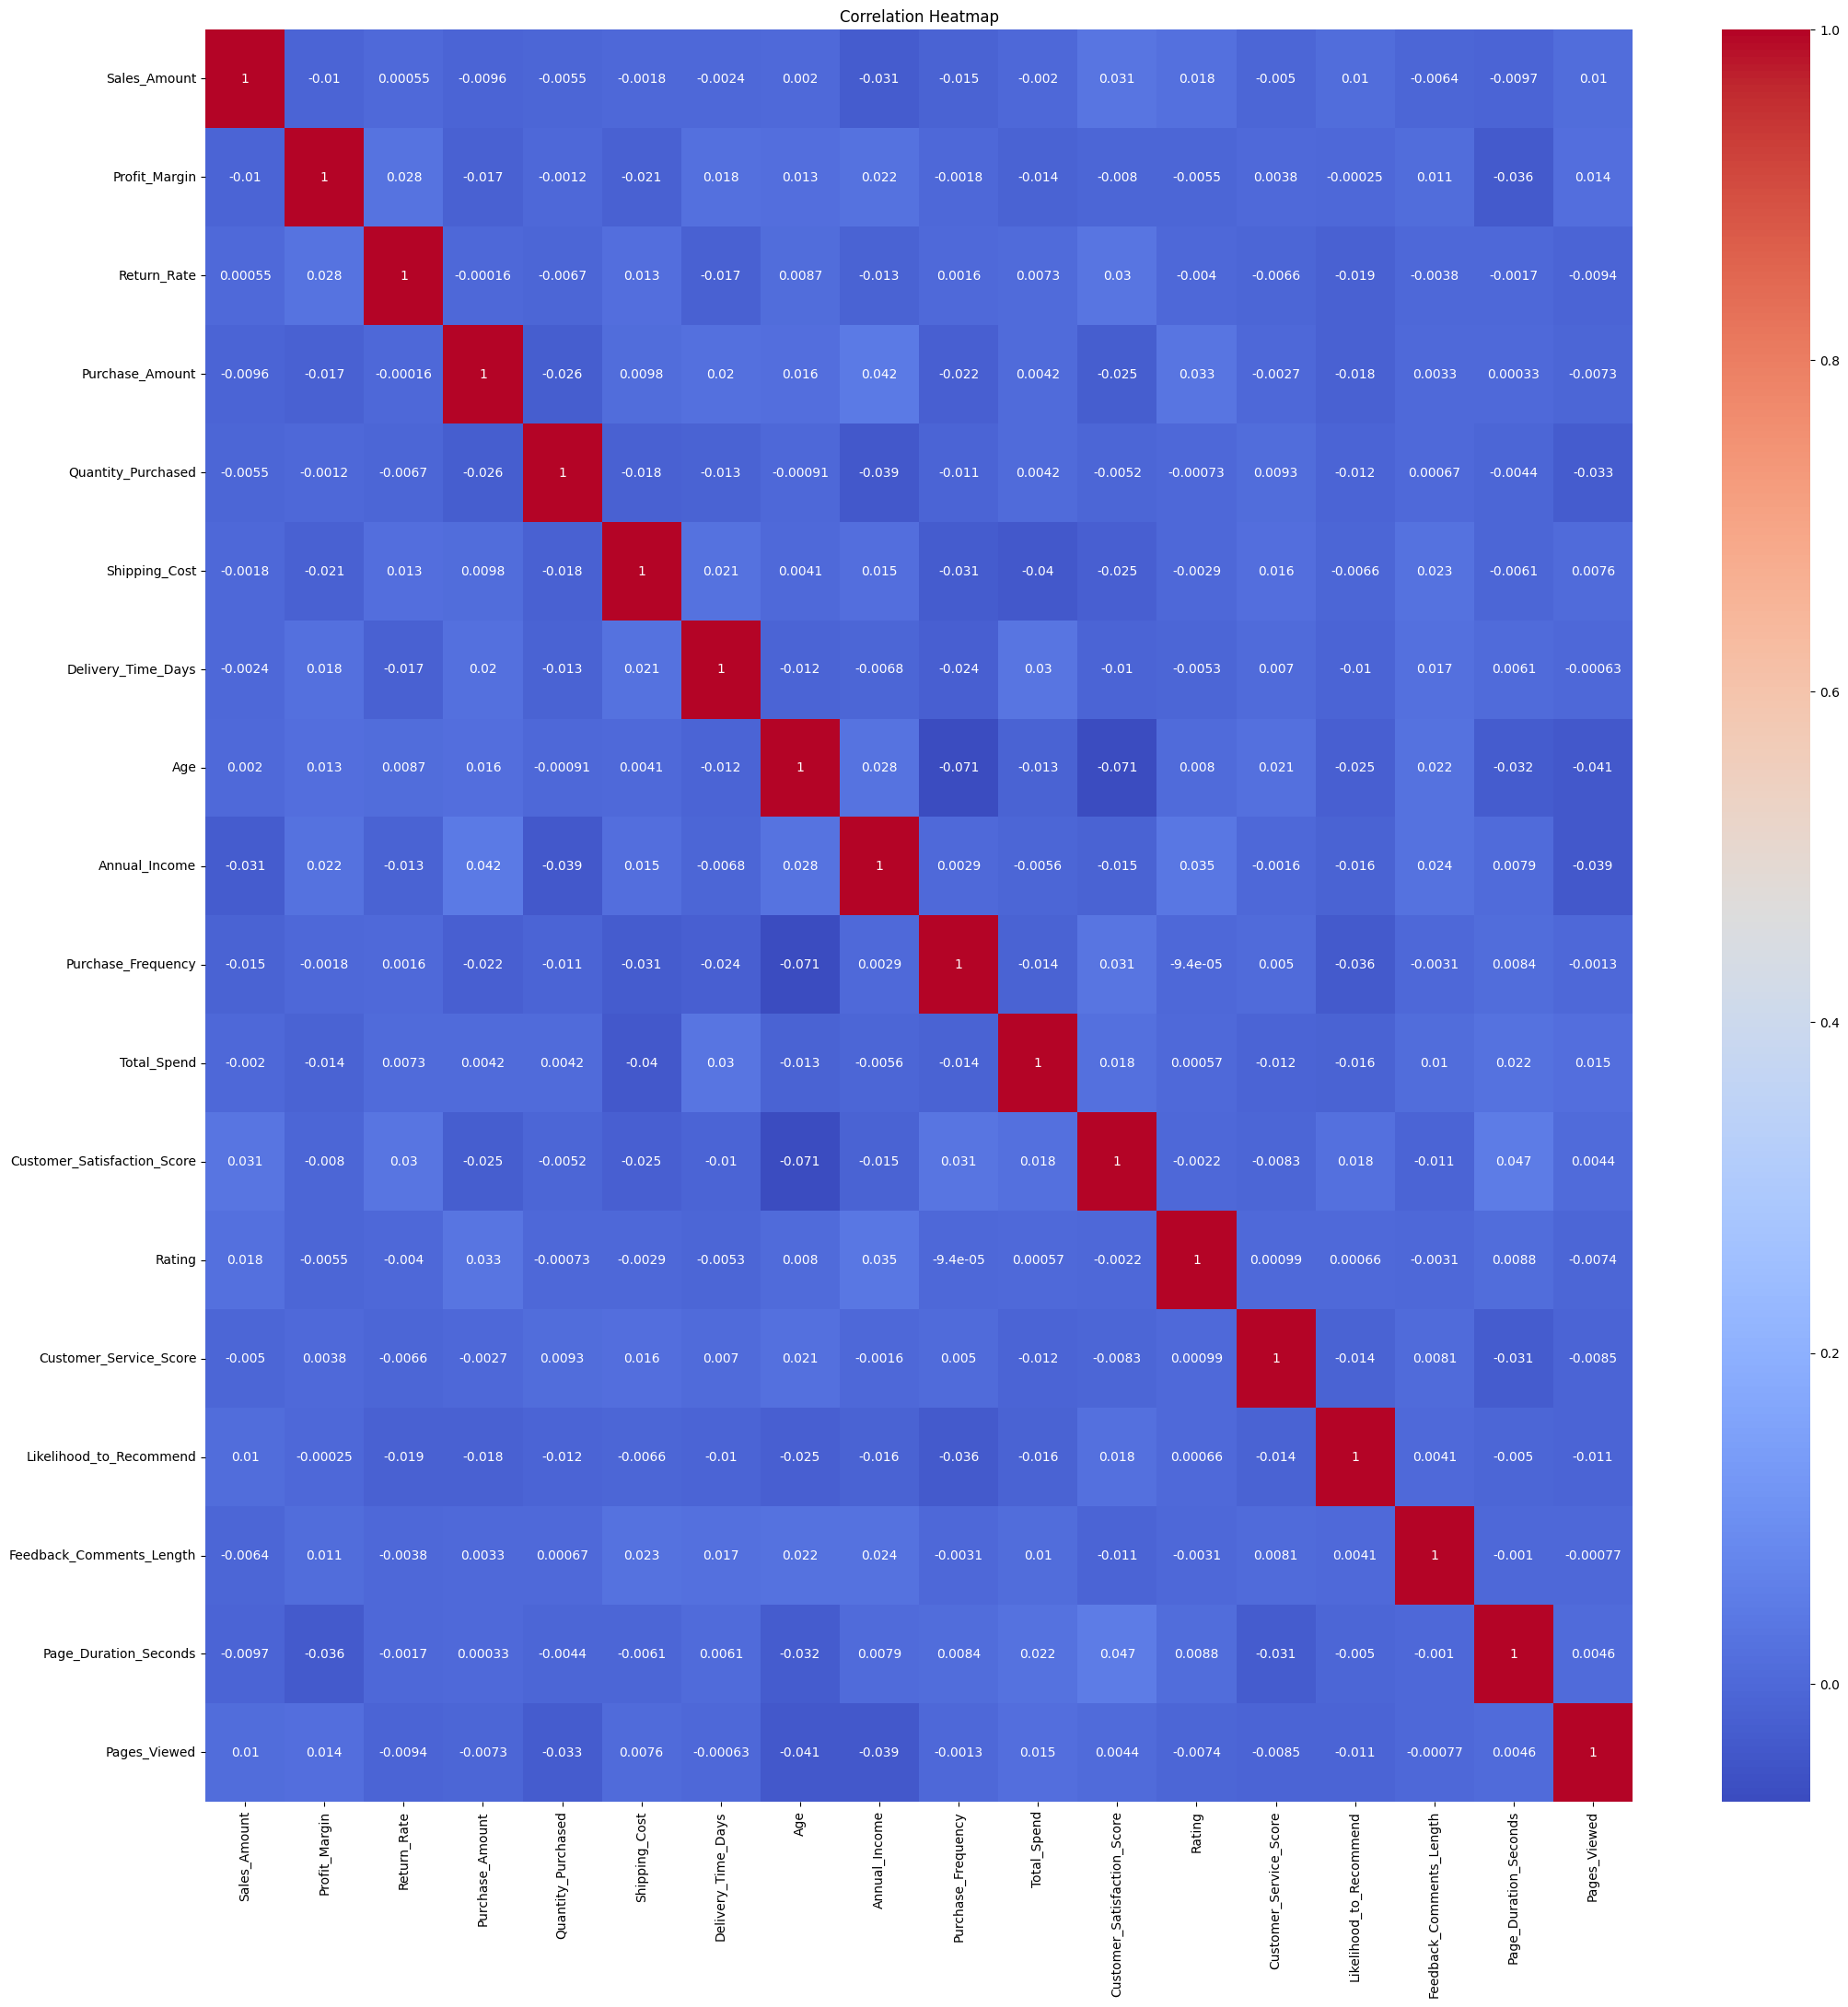

In [39]:
# Correlation Heatmap
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

## Creating Calculated Columns

In [40]:
# Calculate 'Profit' as Sales_Amount * Profit_Margin
df['Profit'] = df['Sales_Amount'] * df['Profit_Margin']

# Calculate 'Customer_Engagement_Score' as Pages_Viewed * Page_Duration_Seconds
df['Customer_Engagement_Score'] = (
    df['Pages_Viewed'] * df['Page_Duration_Seconds'])
# Average Purchase Value per Transaction
df['Avg_Purchase_Value'] = df['Purchase_Amount'] / df['Quantity_Purchased']

# Delivery Efficiency (Time vs. Shipping Cost)
df['Delivery_Efficiency'] = df['Delivery_Time_Days'] / df['Shipping_Cost']

# Customer Lifetime Value Estimate
df['CLV_Estimate'] = df['Annual_Income'] * df['Purchase_Frequency']

# Customer Engagement Level (with Category)
category_weights = {'Gadgets': 1.2, 'Electronics': 1.5, 'Accessories': 1.1}  # Example weights
df['Category_Weight'] = df['Category'].map(category_weights)
df['Customer_Engagement_Level'] = df['Customer_Engagement_Score'] * df['Category_Weight']

# Price Sensitivity
df['Price_Sensitivity'] = df['Purchase_Amount'] / df['Annual_Income']

# Repeat Purchase Indicator
df['Repeat_Purchase'] = df['Purchase_Frequency'].apply(lambda x: 1 if x > 1 else 0)

# Engagement per Visit
df['Engagement_per_Visit'] = df['Page_Duration_Seconds'] / df['Pages_Viewed']

# Adjusted Satisfaction Score (Customer Service Adjustment)
df['Adjusted_Satisfaction_Score'] = df['Customer_Satisfaction_Score'] + df['Customer_Service_Score'] * 0.1

# Likelihood to Return (Adjusted with Rating)
df['Likelihood_to_Return'] = df['Likelihood_to_Recommend'] * df['Rating'] / 5


In [41]:
df.columns

Index(['Sales_ID', 'Customer_ID', 'Product_ID_x', 'Sales_Amount', 'Region',
       'Sales_Date', 'Profit_Margin', 'Discount_Applied_x', 'Sales_Channel',
       'Return_Rate', 'Purchase_ID', 'Product_ID_y', 'Purchase_Amount',
       'Discount_Applied_y', 'Payment_Method', 'Purchase_Date',
       'Quantity_Purchased', 'Shipping_Cost', 'Delivery_Time_Days',
       'Customer_Name', 'Age', 'Gender', 'Annual_Income', 'Country',
       'Purchase_Frequency', 'Loyalty_Status', 'Total_Spend',
       'Customer_Satisfaction_Score', 'Feedback_ID', 'Product_ID', 'Rating',
       'Feedback_Date', 'Feedback_Type', 'Resolution_Status',
       'Customer_Service_Score', 'Likelihood_to_Recommend',
       'Feedback_Comments_Length', 'Session_ID', 'Product_Viewed', 'Category',
       'Page_Duration_Seconds', 'Pages_Viewed', 'Device_Type', 'Referrer',
       'Time_of_Day', 'Bounce', 'Profit', 'Customer_Engagement_Score',
       'Avg_Purchase_Value', 'Delivery_Efficiency', 'CLV_Estimate',
       'Category_Wei

In [42]:
df.shape

(18723, 58)

In [43]:
# Recommended features for regression
recommended_features =df[[
    # Financial Metrics
    'Profit_Margin',
    'Discount_Applied_x',
    'Return_Rate',
    'Sales_Amount',

    # Customer Attributes
    'Annual_Income',
    'Loyalty_Status',
    'Purchase_Frequency',
    'Total_Spend',

    # Purchase Details
    'Purchase_Amount',
    'Quantity_Purchased',
    'Shipping_Cost',
    'Delivery_Time_Days',

    # Product & Browsing Information
    'Category',
    'Pages_Viewed',
    'Page_Duration_Seconds',

    # Session and Interaction Data
    'Referrer',
    'Bounce',
    'Time_of_Day',

    # Feedback and Customer Satisfaction
    'Customer_Service_Score',
    'Likelihood_to_Recommend',
    'Rating',
    'Customer_Satisfaction_Score',

    # Demographics
    'Age',
    'Gender',
    'Country',

    # Caluculated Columns
    'Avg_Purchase_Value', 'Delivery_Efficiency', 'CLV_Estimate',
    'Customer_Engagement_Level', 'Price_Sensitivity', 'Profit',
    'Repeat_Purchase', 'Engagement_per_Visit', 'Adjusted_Satisfaction_Score',
    'Likelihood_to_Return', 'Customer_Engagement_Score',
]]

In [44]:
recommended_features.head()

Profit_Margin Discount_Applied_x  Return_Rate  Sales_Amount  Annual_Income  \
0       0.327759                Yes     0.058271   2181.943599   51845.104313   
1       0.327759                Yes     0.058271   2181.943599   51845.104313   
2       0.327759                Yes     0.058271   2181.943599   51845.104313   
3       0.327759                Yes     0.058271   2181.943599   51845.104313   
4       0.327759                Yes     0.058271   2181.943599   51845.104313   

  Loyalty_Status  Purchase_Frequency   Total_Spend  Purchase_Amount  \
0         Bronze                   1  96141.811199      1068.141792   
1         Bronze                   1  96141.811199      1068.141792   
2         Bronze                   1  96141.811199      1068.141792   
3         Bronze                   1  96141.811199       936.971925   
4         Bronze                   1  96141.811199       936.971925   

   Quantity_Purchased  ...  Delivery_Efficiency  CLV_Estimate  \
0                   2  ...             9.158863  51845.104313   
1                   2  ...             9.158863  51845.104313   
2                   2  ...             9.158863  51845.104313   
3                   4  ...             0.154802  51845.104313   
4                   4  ...             0.154802  51845.104313   

  Customer_Engagement_Level  Price_Sensitivity      Profit Repeat_Purchase  \
0                255.267739           0.020603  715.152437               0   
1                255.267739           0.020603  715.152437               0   
2                255.267739           0.020603  715.152437               0   
3                255.267739           0.018073  715.152437               0   
4                255.267739           0.018073  715.152437               0   

   Engagement_per_Visit Adjusted_Satisfaction_Score  Likelihood_to_Return  \
0              4.341288                    9.855862              2.693952   
1              4.341288                    9.742650              3.830979   
2              4.341288                    9.980324              3.467204   
3              4.341288                    9.855862              2.693952   
4              4.341288                    9.742650              3.830979   

   Customer_Engagement_Score  
0                 212.723116  
1                 212.723116  
2                 212.723116  
3                 212.723116  
4                 212.723116  

[5 rows x 36 columns]

In [46]:
df['Region'].value_counts()

Region
Europe           4029
North America    4023
Australia        3651
South America    3606
Asia             3414
Name: count, dtype: int64

## Filtering Data to South America

In [48]:
# Filter the df for South America region
sads = df[df['Region'] == 'South America']
print("South America Data: \n")
sads.head()

South America Data: 



Sales_ID  Customer_ID  Product_ID_x  Sales_Amount         Region  \
8          4        13036          5459    381.346054  South America   
41        24         7507         17295    963.020123  South America   
42        27        13479         14849    926.495997  South America   
43        27        13479         14849    926.495997  South America   
50        34        11093          7405   2395.928120  South America   

                      Sales_Date  Profit_Margin Discount_Applied_x  \
8  2020-02-10 23:42:42.204467634       0.247525                Yes   
41 2020-02-10 23:42:42.204467634       0.232894                 No   
42 2020-02-10 23:42:42.204467634       0.153991                Yes   
43 2020-02-10 23:42:42.204467634       0.153991                Yes   
50 2020-02-10 23:42:42.204467634       0.391375                Yes   

   Sales_Channel  Return_Rate  ...  Avg_Purchase_Value  Delivery_Efficiency  \
8         Online     0.016797  ...          626.117554             0.053512   
41      In-Store     0.082330  ...           18.770126             0.039894   
42        Online     0.098146  ...          799.468550             0.466140   
43        Online     0.098146  ...          108.507789             0.041137   
50        Online     0.172793  ...           74.262336             0.087811   

    CLV_Estimate Category_Weight Customer_Engagement_Level Price_Sensitivity  \
8   1.320392e+07             1.5               1170.582070          0.009199   
41  1.153939e+06             1.5               1232.850212          0.002342   
42  3.898803e+06             1.1                227.466503          0.013944   
43  3.898803e+06             1.1                227.466503          0.005678   
50  7.004905e+06             1.5                503.625345          0.007124   

    Repeat_Purchase  Engagement_per_Visit  Adjusted_Satisfaction_Score  \
8                 1             86.709783                     5.658083   
41                1             91.322238                     7.918198   
42                1              5.744104                     2.590933   
43                1              5.744104                     2.590933   
50                1              4.145065                     6.138021   

   Likelihood_to_Return  
8              1.831063  
41             1.927856  
42             2.428866  
43             2.428866  
50             0.353503  

[5 rows x 58 columns]

In [49]:
sads.shape

(3606, 58)

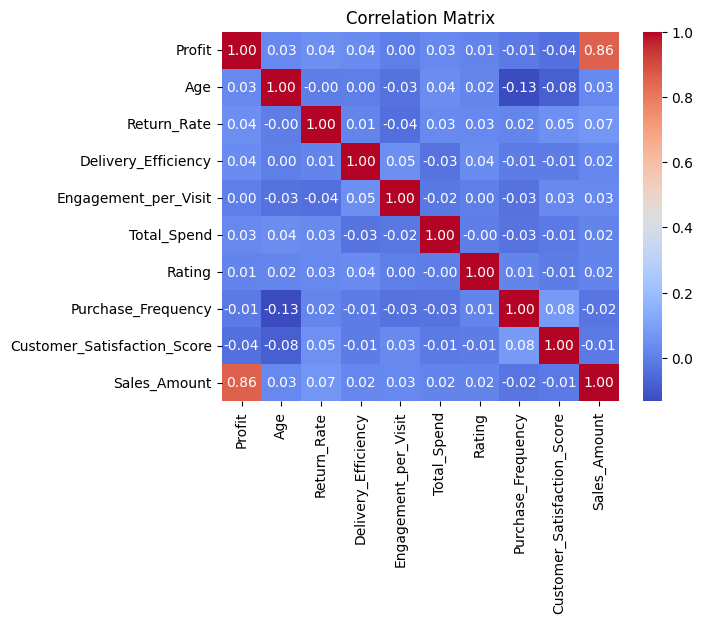

In [51]:
#important Features
impfeatures = ['Profit','Age', 'Return_Rate', 'Delivery_Efficiency','Engagement_per_Visit',
            'Total_Spend','Rating', 'Purchase_Frequency', 'Customer_Satisfaction_Score', 'Sales_Amount']

correlation_matrix = sads[impfeatures].corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Importing Necessary libraries

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Feature Selection

In [53]:
# Feature and target selection
features = ['Profit','Age', 'Return_Rate', 'Delivery_Efficiency','Engagement_per_Visit',
            'Total_Spend','Rating', 'Purchase_Frequency', 'Customer_Satisfaction_Score']
target = 'Sales_Amount'

X = sads[features]
y = sads[target]

In [54]:
# Splitting data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Model Building

## Random Forest Regressor

In [55]:
# Model training
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluation
mse1 = mean_squared_error(y_train, y_train_pred)
mse2 = mean_squared_error(y_test, y_test_pred)
r2_1 = r2_score(y_train, y_train_pred)
r2_2 = r2_score(y_test, y_test_pred)

print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {y_train.shape}")
print(f"Y Test Shape: {y_test.shape}")
print(f"Mean Squared Error (Train): {mse1}")
print(f"Mean Squared Error (Test): {mse2}")
print(f"R2 Score (train): {r2_1}")
print(f"R2 Score (Test): {r2_2}")

X Train Shape: (2884, 9)
X Test Shape: (722, 9)
Y Train Shape: (2884,)
Y Test Shape: (722,)
Mean Squared Error (Train): 16737.124912864827
Mean Squared Error (Test): 101432.2300113516
R2 Score (train): 0.9928841491158175
R2 Score (Test): 0.9632640480675541


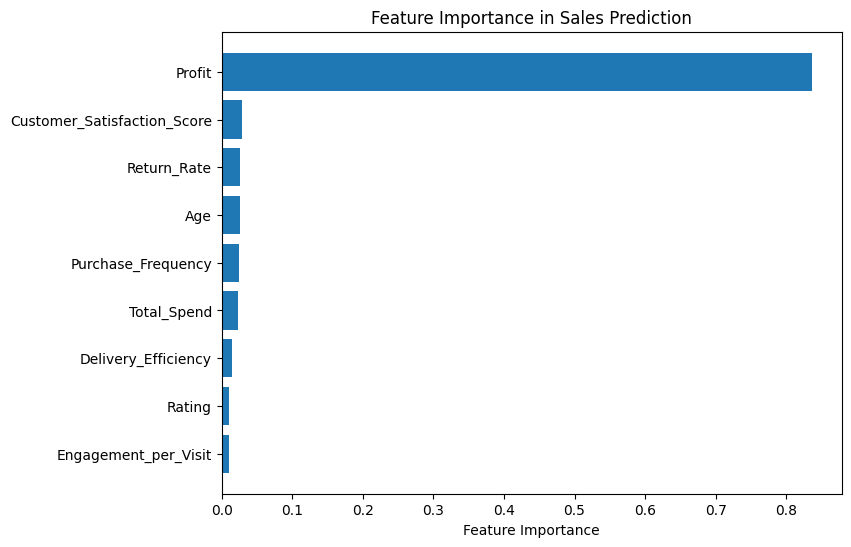

In [56]:
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh([features[i] for i in sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Sales Prediction")
plt.show()

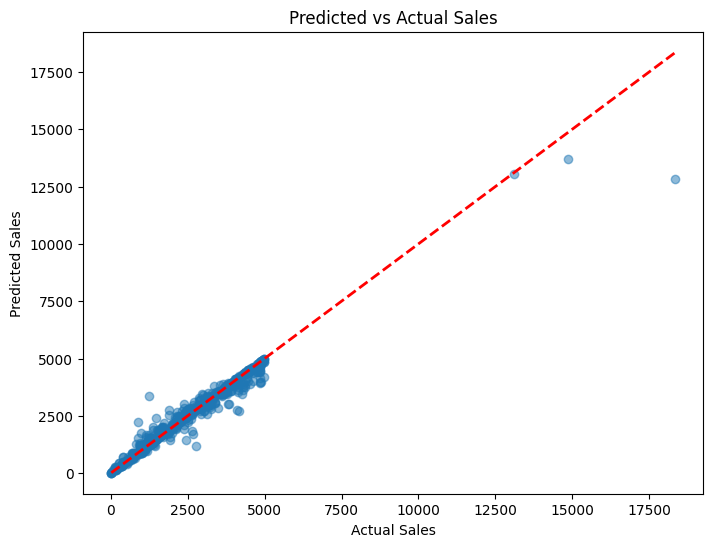

In [57]:
# Scatter plot for predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.show()

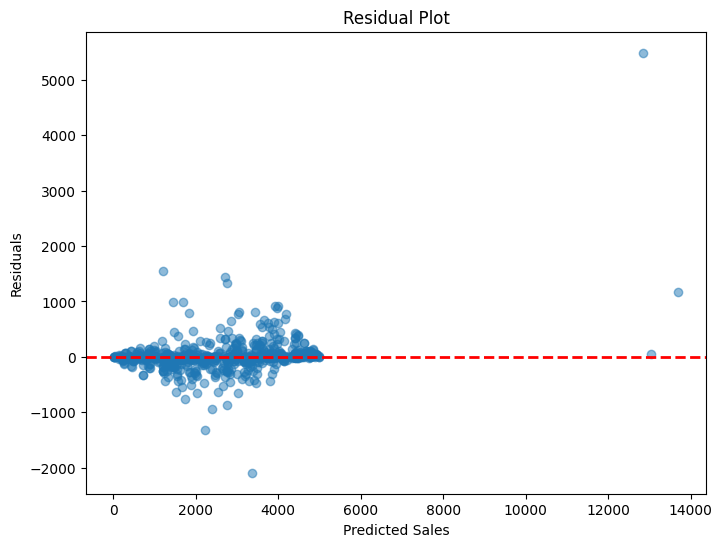

In [58]:
# Residuals
residuals = y_test - y_test_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

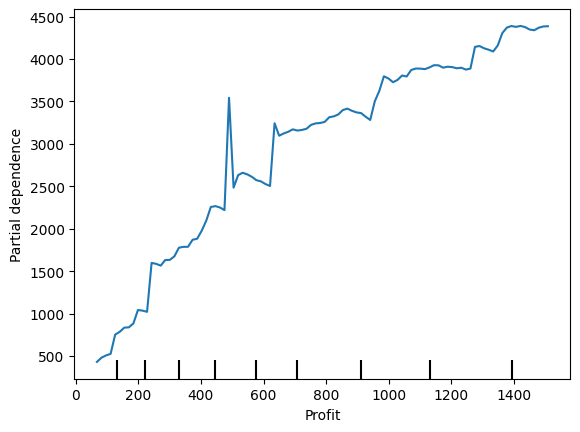

In [59]:
# Plotting partial dependence for a single feature 'Profit_Margin'
PartialDependenceDisplay.from_estimator(rf_model, X_test, ['Profit'], kind='average')
plt.show()

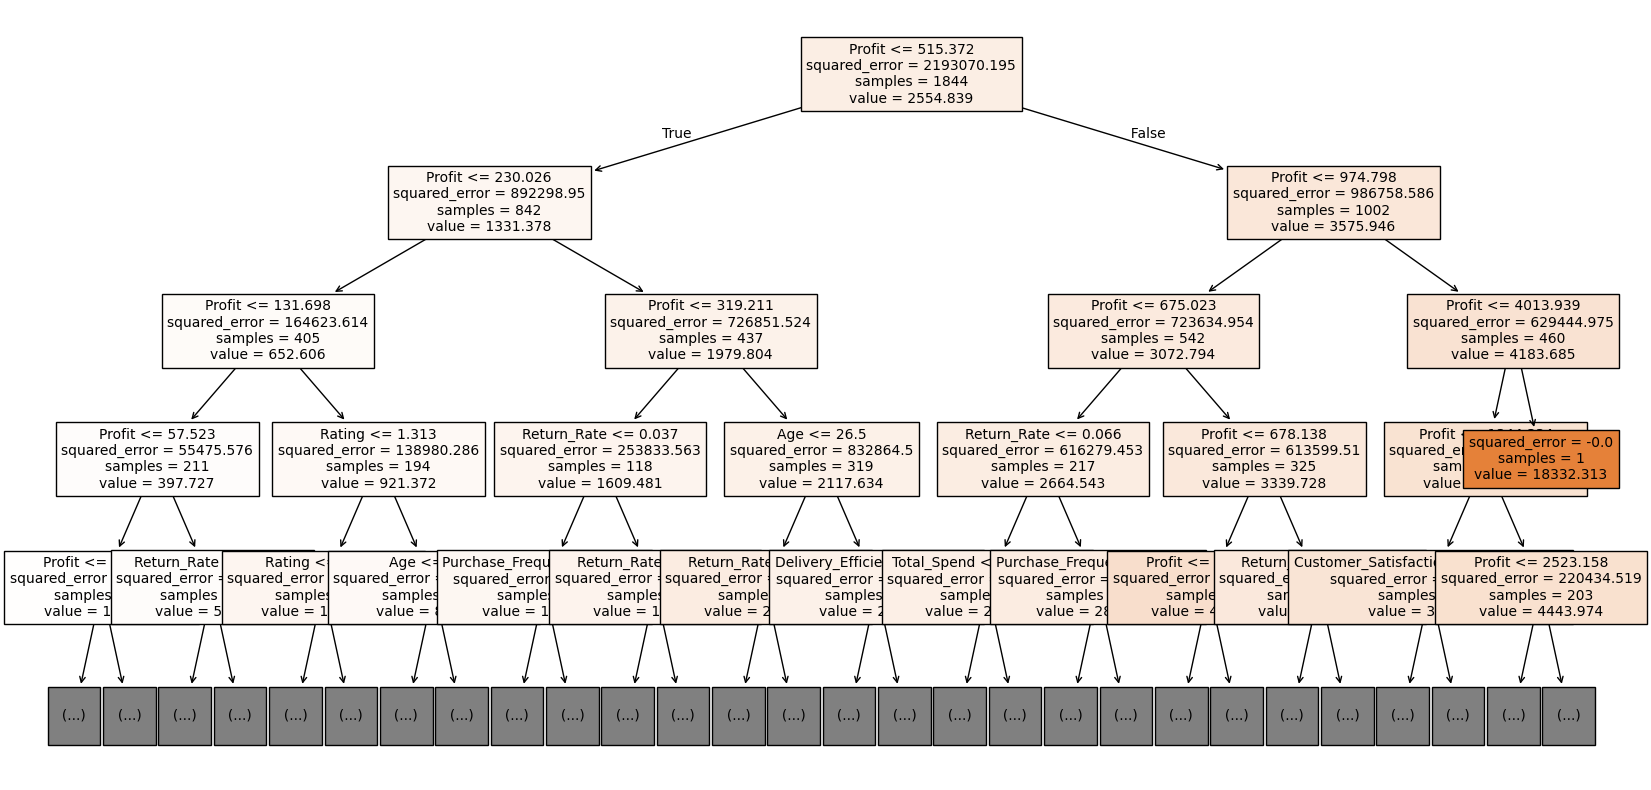

In [ ]:
# Plotting a single decision tree
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=features, filled=True, max_depth=4, fontsize=10)
plt.show()

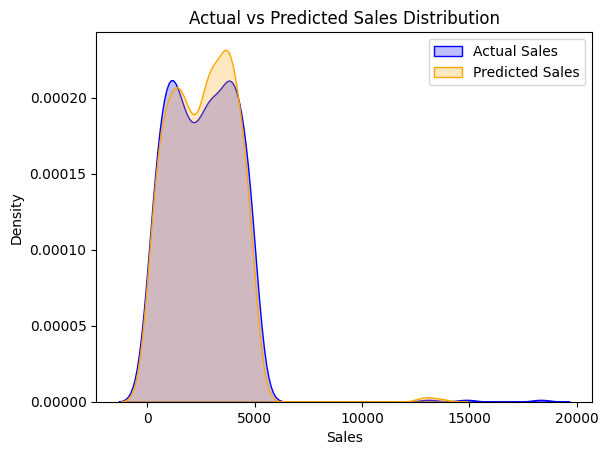

In [85]:
sns.kdeplot(y_test, label="Actual Sales", fill=True, color="blue")
sns.kdeplot(y_test_pred, label="Predicted Sales", fill=True, color="orange")
plt.xlabel("Sales")
plt.title("Actual vs Predicted Sales Distribution")
plt.legend()
plt.show()

## XGBRegressor

In [ ]:
# Initializing the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=5,  # Maximum depth of a tree
    subsample=0.8,  # Fraction of samples used per tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the train & test set
y_pred_train = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor - Train Set X_train shape{X_train.shape}, Y_train shape{y_train.shape} ")
print("XGBoost Regressor - Mean Squared Error:", mse_train)
print("XGBoost Regressor - R2 Score:", r2_train)

print(f"\nXGBoost Regressor - Test Set X_train shape{X_test.shape}, Y_train shape{y_test.shape} ")
print("XGBoost Regressor - Mean Squared Error:", mse_xgb)
print("XGBoost Regressor - R2 Score:", r2_xgb)

XGBoost Regressor - Train Set X_train shape(2884, 9), Y_train shape(2884,) 
XGBoost Regressor - Mean Squared Error: 96410.42360659318
XGBoost Regressor - R2 Score: 0.9603766761964505

XGBoost Regressor - Test Set X_train shape(722, 9), Y_train shape(722,) 
XGBoost Regressor - Mean Squared Error: 182033.8350713951
XGBoost Regressor - R2 Score: 0.9253145648359857


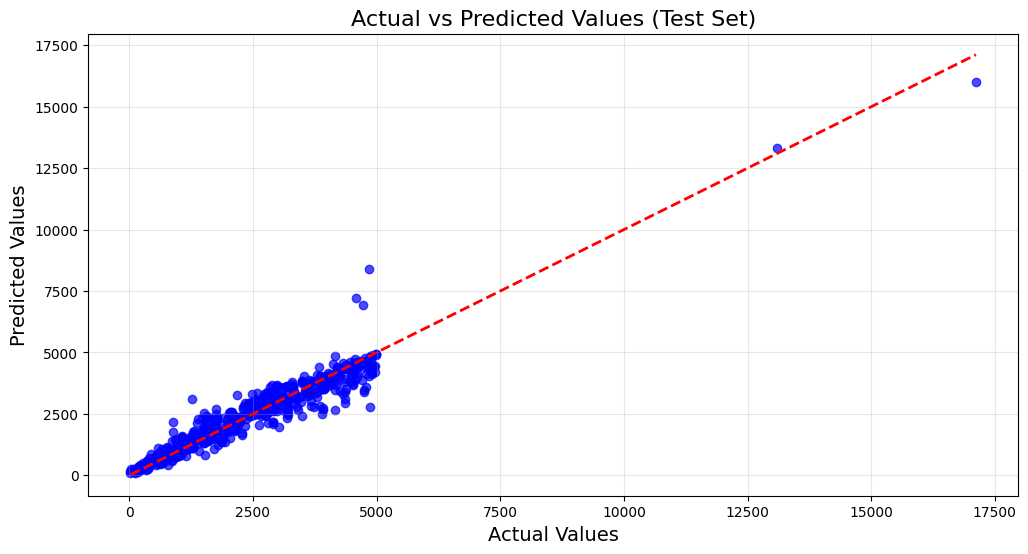

In [ ]:
# Actual vs. Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Values (Test Set)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

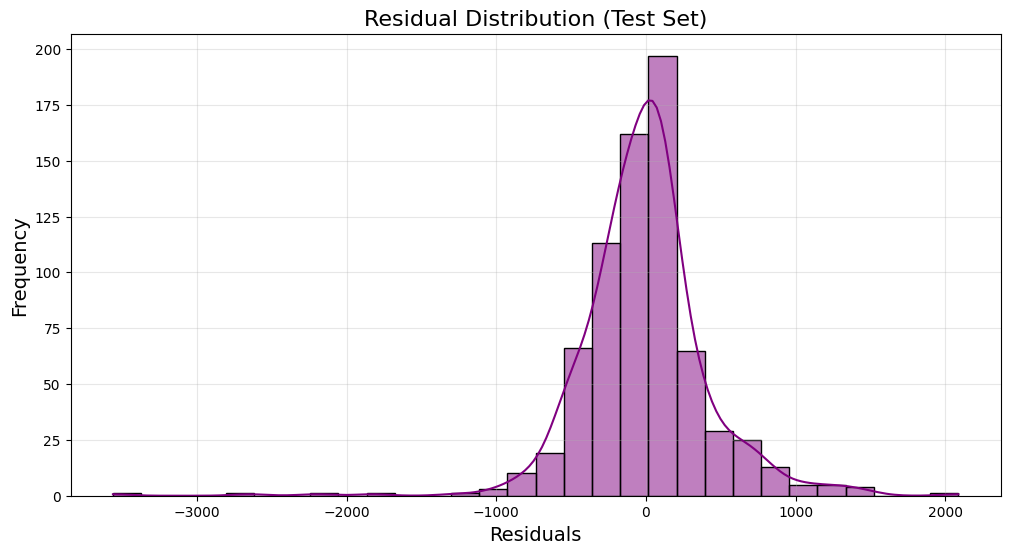

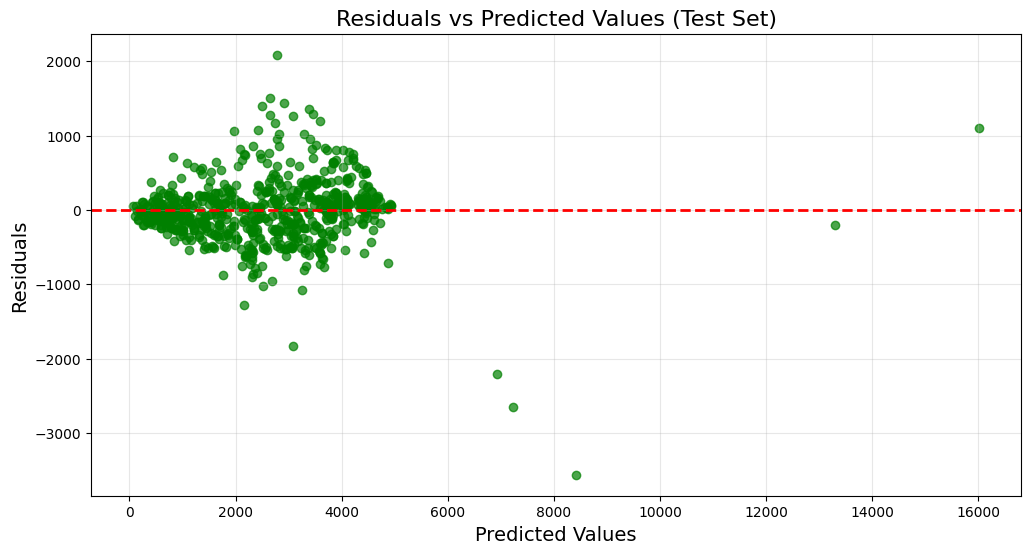

In [ ]:
# Residual Plot
residuals = y_test - y_pred_xgb

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Distribution (Test Set)", fontsize=16)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted Values (Test Set)", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


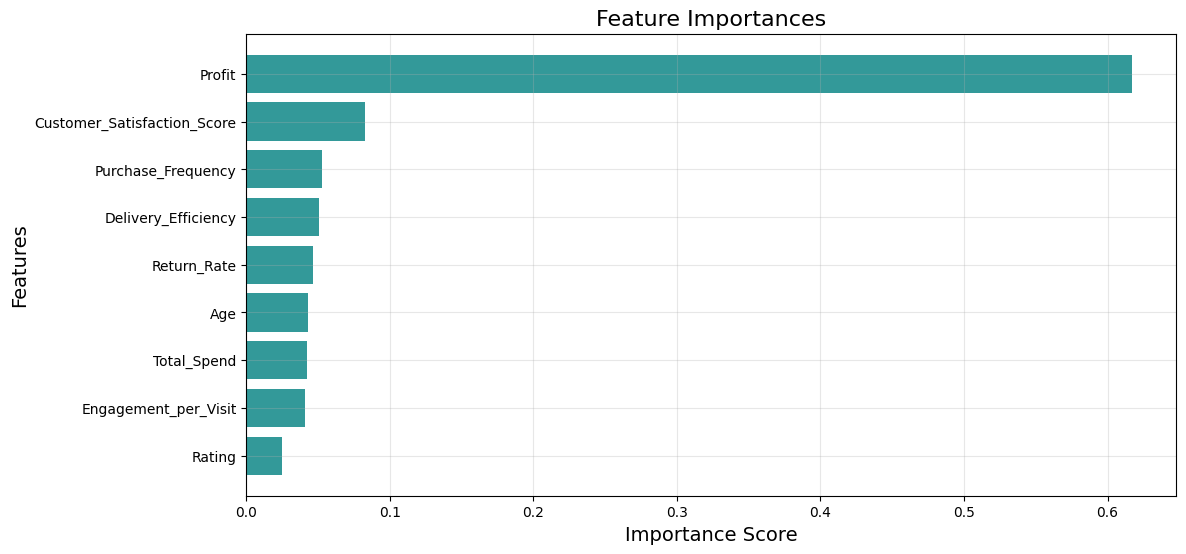

In [ ]:
# Feature Importance
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
sorted_features = np.array(X_train.columns)[sorted_idx]

plt.figure(figsize=(12, 6))
plt.barh(sorted_features, feature_importances[sorted_idx], color='teal', alpha=0.8)
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Model Comparison

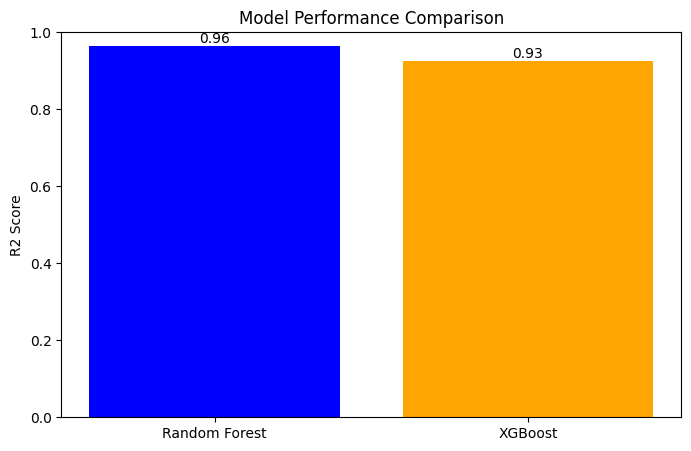

In [ ]:
# Model names and their corresponding R2 scores
models = ['Random Forest', 'XGBoost']
r2_scores = [r2_2, r2_xgb]

# Plot the R2 scores
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color=['blue', 'orange'])  # Store the bar objects
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # R2 scores range between 0 and 1

# Add data labels
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{score:.2f}', ha='center', va='bottom')

plt.show()

# K-Mean Clustering

In [ ]:
df["Loyalty_Status"].value_counts()

Loyalty_Status
Bronze    6523
Gold      6213
Silver    5987
Name: count, dtype: int64

In [ ]:
# accessing object columns
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Sales_ID', 'Customer_ID', 'Product_ID_x', 'Region',
       'Discount_Applied_x', 'Sales_Channel', 'Purchase_ID', 'Product_ID_y',
       'Discount_Applied_y', 'Payment_Method', 'Customer_Name', 'Gender',
       'Country', 'Loyalty_Status', 'Feedback_ID', 'Product_ID',
       'Feedback_Type', 'Resolution_Status', 'Session_ID', 'Product_Viewed',
       'Category', 'Device_Type', 'Referrer', 'Time_of_Day'],
      dtype='object')


In [82]:
# Prepare and encode the data (excluding Customer_ID for clustering)
features = ['Purchase_Frequency', 'Customer_Satisfaction_Score', 'Loyalty_Status']
X = pd.get_dummies(df[features].dropna(), columns=['Loyalty_Status'], drop_first=False)

# Standardize and perform clustering
X_scaled = StandardScaler().fit_transform(X)
cluster_labels = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)

# Add cluster labels to the dataframe (keeping the original data intact)
df['Cluster'] = cluster_labels

# Cluster descriptions
cluster_desc = {0: 'Moderate Engagement', 1: 'Low Engagement', 2: 'High Engagement'}

# Plot setup
loyalty_columns = [col for col in X.columns if 'Loyalty_Status_' in col]
scatter3d = go.Scatter3d(
    x=df['Purchase_Frequency'], y=df['Customer_Satisfaction_Score'], z=X[loyalty_columns[0]],
    mode='markers', marker=dict(size=5, color=cluster_labels, colorscale='viridis', opacity=0.8, showscale=True),
    text=[f"Customer ID: {cid}<br>Cluster: {cluster_desc[cl]}<br>Purchase Frequency: {pf:.2f}<br>Satisfaction: {sat:.2f}<br>Loyalty Status: {'Gold' if loy[0] == 1 else 'Silver' if loy[1] == 1 else 'Bronze'}"
          for cid, cl, pf, sat, loy in zip(df['Customer_ID'], cluster_labels, df['Purchase_Frequency'], df['Customer_Satisfaction_Score'], X[loyalty_columns].values)],
    hoverinfo='text'
)

# Create and update layout
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]], subplot_titles=['3D Customer Segments'])
fig.add_trace(scatter3d)
fig.update_layout(
    height=1000, width=1000, title="Customer Segmentation", title_x=0.5, title_font=dict(size=24), showlegend=False
).update_scenes(
    xaxis_title_text='Purchase Frequency', yaxis_title_text='Customer Satisfaction Score', zaxis_title_text='Loyalty Status (Encoded)',
    camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.5, y=1.5, z=1.5))
)

# Show plot
fig.show()


In [83]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4972
